## Credit EDA Assignment 
-------------------------------------By:- Rashmi Singh------------------------------------------------------
<hr/>

### Import the necessary Libraries
<hr/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ; sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import statistics
pd.set_option('display.max_columns', 130)
pd.set_option('display.max_rows', 500)

### Read and checking the dataset 
<hr/>

In [2]:
app_df = pd.read_csv("application_data.csv")

In [3]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
prev_df = pd.read_csv("previous_application.csv")

In [5]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
column_df = pd.read_csv("columns_description.csv", encoding='cp1252')

In [7]:
column_df.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [8]:
app_df.shape

(307511, 122)

In application dataset we have 307511 rows and 122 columns

In [9]:
app_df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [10]:
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [11]:
app_df.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [12]:
### Categorical Col
categ = app_df.select_dtypes("object").columns
categ

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [13]:
### numerical Col
numerical = app_df.select_dtypes(["int64", "float64"]).columns.tolist()
numerical

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

## Data Cleaning
Missing Value  

In [14]:
missing = (app_df.isnull().mean() *100).sort_values(ascending = False)
missing

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

Due to threshold theory if any dataset we have more than 40% we can drop the column because that column don't give accurate result

Remove missing value more than 40%

In [15]:
app_df  = app_df.loc[:,missing<40 ]

In [16]:
app_df.shape

(307511, 73)

In [17]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [18]:
wasted_col = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
        'FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL',
                'REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',"EXT_SOURCE_2",
               "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"]

We have useless columns like flag and in this values are 0 or 1 and not which is not giving such useful information so we need to drop it this column

In [19]:
app_df.drop(wasted_col, axis = 1, inplace = True)

In [20]:
app_df.shape

(307511, 40)

Now we have 307511 rows and 73 columns

**Now we need to find again categorical and numerical column**

In [21]:
### Categorical Col
categ = app_df.select_dtypes("object").columns
categ

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [22]:
### numerical Col
numerical = app_df.select_dtypes(["int64", "float64"]).columns
numerical

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [23]:
null_new = (app_df.isnull().mean() *100).sort_values(ascending = False)
null_new[null_new>0]

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
NAME_TYPE_SUITE                0.420148
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

### Now one by one handle and fill the missing value
OCCUPATION_TYPE               31.345545

EXT_SOURCE_3                  19.825307

AMT_REQ_CREDIT_BUREAU_DAY     13.501631

AMT_REQ_CREDIT_BUREAU_HOUR    13.501631

AMT_REQ_CREDIT_BUREAU_YEAR    13.501631

AMT_REQ_CREDIT_BUREAU_WEEK    13.501631

AMT_REQ_CREDIT_BUREAU_QRT     13.501631

AMT_REQ_CREDIT_BUREAU_MON     13.501631

NAME_TYPE_SUITE                0.420148

AMT_GOODS_PRICE                0.090403

AMT_ANNUITY                    0.003902

CNT_FAM_MEMBERS                0.000650

DAYS_LAST_PHONE_CHANGE         0.000325

**Note:- we have 2 ways to fill missing value**

1) if variable is **object** means categorical so will fill with **Mode**

2) if variable is **int** or **float** means numerical so will fill with **Median** or **Mean** 

**If we have numerical variable so we preferred fill with meadian because due to outlier in data set they impact mean but not median** 

### OCCUPATION_TYPE

**The occupation Type is categorical so we need to fill it with mode**

In [24]:
app_df.OCCUPATION_TYPE.describe() 

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

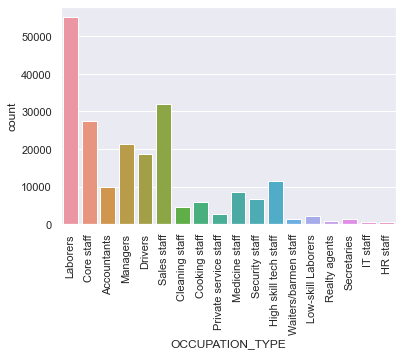

In [25]:
sns.countplot(data=app_df, x="OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

In [26]:
app_df.OCCUPATION_TYPE.mode()[0]

'Laborers'

In [27]:
app_df.OCCUPATION_TYPE.fillna(app_df.OCCUPATION_TYPE.mode()[0], inplace=True)

In [28]:
null_new = (app_df.isnull().mean() *100).sort_values(ascending = False)
null_new[null_new>0]

EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

### EXT_SOURCE_3

**The EXT_SOURCE_3 is numerical column we need to fill median**

In [29]:
app_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

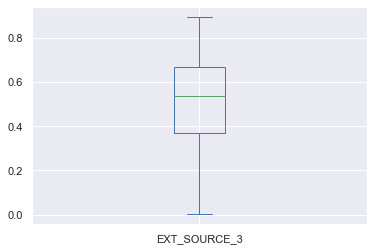

In [30]:
app_df.EXT_SOURCE_3.plot.box()
plt.show()

In [31]:
app_df.EXT_SOURCE_3.median()

0.5352762504724826

In [32]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(), inplace=True)

In [33]:
null_new = (app_df.isnull().mean() *100).sort_values(ascending = False)
null_new[null_new>0]

AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

#### Now we need to treat missing value in 13% columns

### AMT_REQ_CREDIT_BUREAU_YEAR

In [34]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

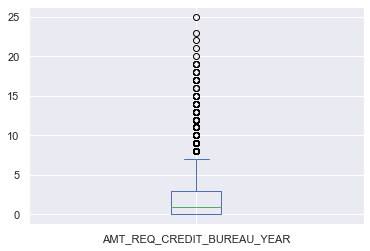

In [35]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.plot.box();

### we found outlier in this AMT_REQ_CREDIT_BUREAU_YEAR so we need to fill missing value by median

In [36]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.median()

1.0

In [37]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app_df.AMT_REQ_CREDIT_BUREAU_YEAR.median(), inplace = True)

In [38]:
null_new = (app_df.isnull().mean() *100).sort_values(ascending = False)
null_new[null_new>0]

AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

### AMT_REQ_CREDIT_BUREAU_QRT

In [39]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

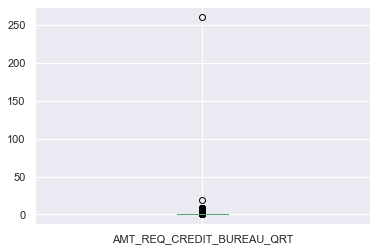

In [40]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.plot.box();

In [41]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.median()

0.0

In [42]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(app_df.AMT_REQ_CREDIT_BUREAU_QRT.median(), inplace = True)

In [43]:
null_new = (app_df.isnull().mean() *100).sort_values(ascending = False)
null_new[null_new>0]

AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64

### AMT_REQ_CREDIT_BUREAU_MON

In [44]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

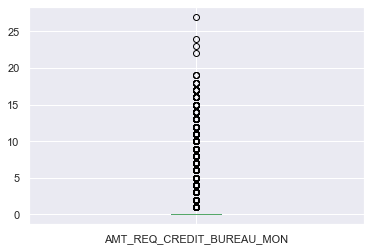

In [45]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.plot.box();

In [46]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.median()

0.0

In [47]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.fillna(app_df.AMT_REQ_CREDIT_BUREAU_MON.median(), inplace = True)

### AMT_REQ_CREDIT_BUREAU_WEEK

In [48]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

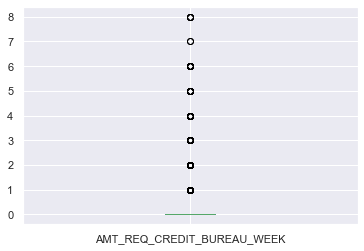

In [49]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.plot.box();

In [50]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.median()

0.0

In [51]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app_df.AMT_REQ_CREDIT_BUREAU_WEEK.median(), inplace = True)

### AMT_REQ_CREDIT_BUREAU_DAY

In [52]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

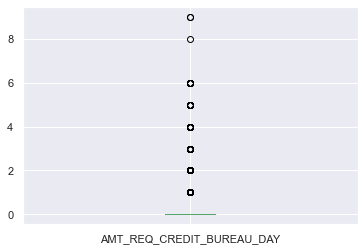

In [53]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.plot.box();

In [54]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.median()

0.0

In [55]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app_df.AMT_REQ_CREDIT_BUREAU_DAY.median(), inplace = True)

### AMT_REQ_CREDIT_BUREAU_HOUR

In [56]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

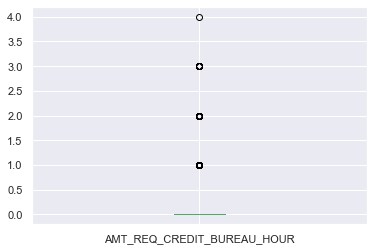

In [57]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.plot.box();

In [58]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.median()

0.0

In [59]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app_df.AMT_REQ_CREDIT_BUREAU_HOUR.median(), inplace = True)

In [60]:
null_new = (app_df.isnull().mean() *100).sort_values(ascending = False)
null_new[null_new>0]

NAME_TYPE_SUITE           0.420148
AMT_GOODS_PRICE           0.090403
AMT_ANNUITY               0.003902
CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

### Now we need to fill missing values below by 1 percentage

### NAME_TYPE_SUITE

In [61]:
app_df.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

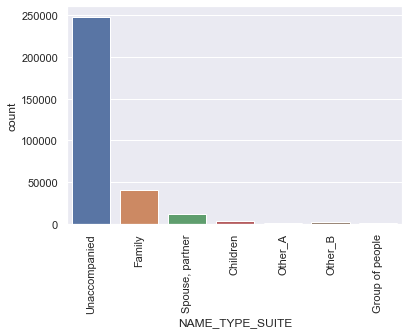

In [62]:
sns.countplot(data = app_df, x = "NAME_TYPE_SUITE");
plt.xticks(rotation = 90);

In [63]:
app_df.NAME_TYPE_SUITE.mode()[0]

'Unaccompanied'

In [64]:
app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0],  inplace = True)

In [65]:
null_new = (app_df.isnull().mean() *100).sort_values(ascending = False)
null_new[null_new>0]

AMT_GOODS_PRICE           0.090403
AMT_ANNUITY               0.003902
CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

### AMT_GOODS_PRICE

In [66]:
app_df.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [67]:
app_df.AMT_GOODS_PRICE.median()

450000.0

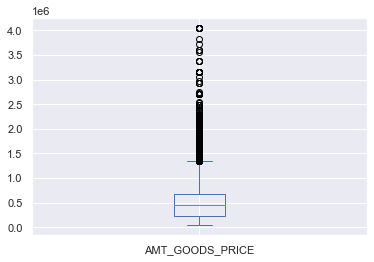

In [68]:
app_df.AMT_GOODS_PRICE.plot.box();

In [69]:
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(), inplace = True)

In [70]:
null_new = (app_df.isnull().mean() *100).sort_values(ascending = False)
null_new[null_new>0]

AMT_ANNUITY               0.003902
CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

### AMT_ANNUITY

In [71]:
app_df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

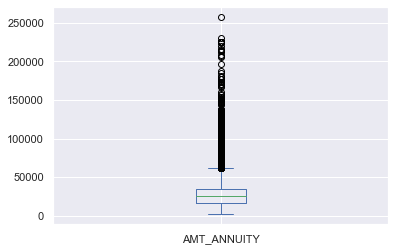

In [72]:
app_df.AMT_ANNUITY.plot.box();

In [73]:
app_df.AMT_ANNUITY.median()

24903.0

In [74]:
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(), inplace = True)

In [75]:
null_new = (app_df.isnull().mean() *100).sort_values(ascending = False)
null_new[null_new>0]

CNT_FAM_MEMBERS           0.000650
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

### CNT_FAM_MEMBERS

In [76]:
app_df.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [77]:
app_df.CNT_FAM_MEMBERS.median()

2.0

In [78]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.median(), inplace = True)

In [79]:
null_new = (app_df.isnull().mean() *100).sort_values(ascending = False)
null_new[null_new>0]

DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

### DAYS_LAST_PHONE_CHANGE

In [80]:
app_df.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

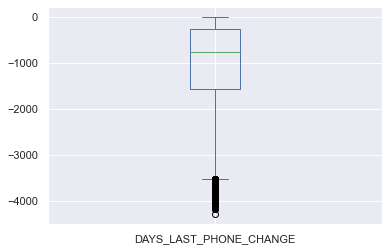

In [81]:
app_df.DAYS_LAST_PHONE_CHANGE.plot.box();

In [82]:
app_df.DAYS_LAST_PHONE_CHANGE.median()

-757.0

In [83]:
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(), inplace = True)

In [84]:
(app_df.isnull().mean() *100).sort_values(ascending = False)


SK_ID_CURR                     0.0
TARGET                         0.0
CNT_FAM_MEMBERS                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_3                   0.0
DAYS_LAST_PHONE_CHANGE         0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
OCCUPATION_TYPE                0.0
DAYS_ID_PUBLISH                0.0
DAYS_REGISTRATION              0.0
AMT_ANNUITY                    0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL    

**We need to check days column where -ve values are there so we need to convert it to positive by using absolute**
<hr/>

In [85]:
app_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']] 

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION
0,-9461,-637,-2120,-3648.0
1,-16765,-1188,-291,-1186.0
2,-19046,-225,-2531,-4260.0
3,-19005,-3039,-2437,-9833.0
4,-19932,-3038,-3458,-4311.0
...,...,...,...,...
307506,-9327,-236,-1982,-8456.0
307507,-20775,365243,-4090,-4388.0
307508,-14966,-7921,-5150,-6737.0
307509,-11961,-4786,-931,-2562.0


In [86]:
app_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']] = abs(app_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']])

In [87]:
days_col = app_df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_REGISTRATION']]
days_col

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION
0,9461,637,2120,3648.0
1,16765,1188,291,1186.0
2,19046,225,2531,4260.0
3,19005,3039,2437,9833.0
4,19932,3038,3458,4311.0
...,...,...,...,...
307506,9327,236,1982,8456.0
307507,20775,365243,4090,4388.0
307508,14966,7921,5150,6737.0
307509,11961,4786,931,2562.0


**We are not cleared here using days column so we need to convert in year for better understanding** 

In [88]:
app_df["YEAR_BIRTH"] = app_df["DAYS_BIRTH"] / 365
app_df["YEAR_EMPLOYED"] = app_df["DAYS_EMPLOYED"] / 365
app_df["YEAR_ID_PUBLISHED"] = app_df["DAYS_ID_PUBLISH"] / 365
app_df["YEAR_REGISTRATION"] = app_df["DAYS_REGISTRATION"] / 365

In [89]:
app_df[["YEAR_BIRTH", "YEAR_EMPLOYED", "YEAR_ID_PUBLISHED", "YEAR_REGISTRATION"]]

,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_ID_PUBLISHED,YEAR_REGISTRATION
0,25.920548,1.745205,5.808219,9.994521
1,45.931507,3.254795,0.797260,3.249315
2,52.180822,0.616438,6.934247,11.671233
3,52.068493,8.326027,6.676712,26.939726
4,54.608219,8.323288,9.473973,11.810959
...,...,...,...,...
307506,25.553425,0.646575,5.430137,23.167123
307507,56.917808,1000.665753,11.205479,12.021918
307508,41.002740,21.701370,14.109589,18.457534
307509,32.769863,13.112329,2.550685,7.019178


Drop now all days column because now we have year column

In [90]:
app_df.drop(days_col, axis = 1, inplace  = True)

In [91]:
app_df.shape

(307511, 40)

In [92]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

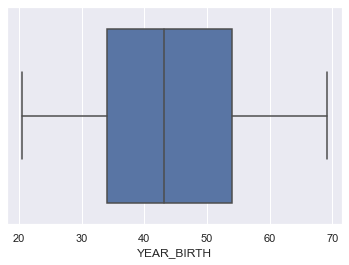

In [93]:
sns.boxplot(app_df.YEAR_BIRTH);

In [94]:
app_df.YEAR_BIRTH.describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEAR_BIRTH, dtype: float64

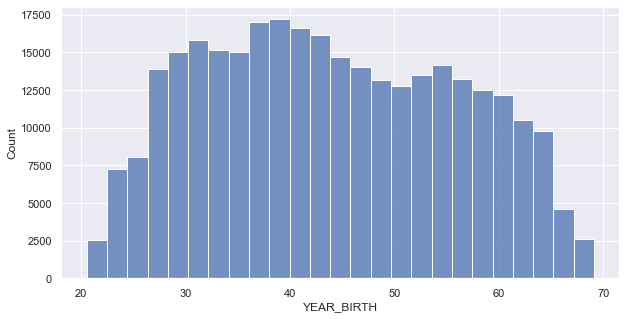

In [95]:
plt.figure(figsize = (10,5))
sns.histplot(app_df.YEAR_BIRTH, bins = 25);

### YEAR_ID_PUBLISHED

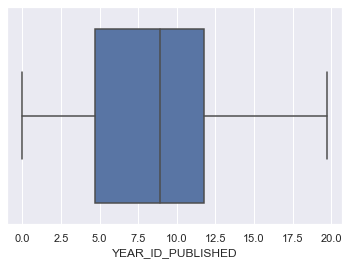

In [96]:

sns.boxplot(app_df.YEAR_ID_PUBLISHED);

### YEAR_EMPLOYED

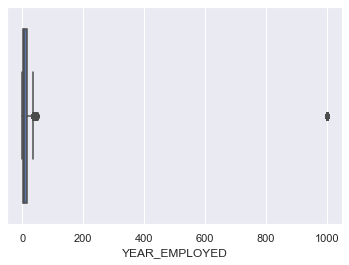

In [97]:
sns.boxplot(app_df.YEAR_EMPLOYED);

### YEAR_REGISTRATION

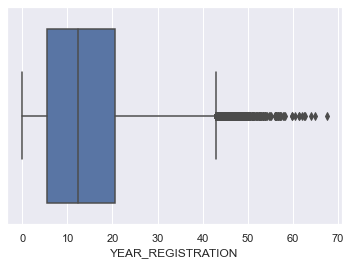

In [98]:
sns.boxplot(app_df.YEAR_REGISTRATION);

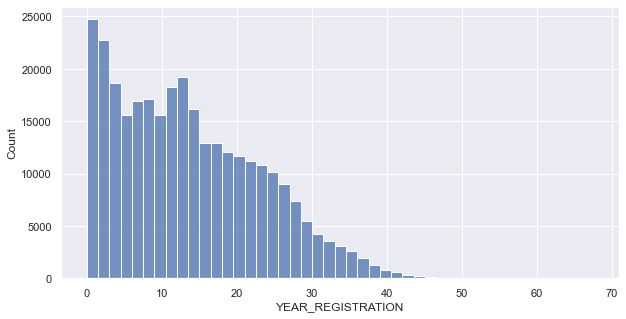

In [99]:
plt.figure(figsize = (10,5))
sns.histplot(app_df.YEAR_REGISTRATION, bins  = 45);

In [100]:

app_df.CODE_GENDER.value_counts(normalize = True)*100

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

We need to replace code gender XNA rows to female because it's only 4

In [101]:
app_df.CODE_GENDER.replace("XNA", "F", inplace = True)

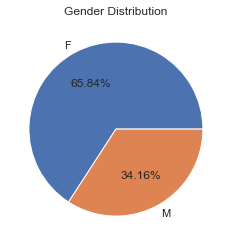

In [102]:
# Plot the pie chart
plt.pie(app_df['CODE_GENDER'].value_counts(), labels=app_df['CODE_GENDER'].value_counts().index, autopct='%2.2f%%')
# Add a title to the chart
plt.title('Gender Distribution')

# Display the chart
plt.show()

### Female applicants are more as compare to male applicants
<hr>

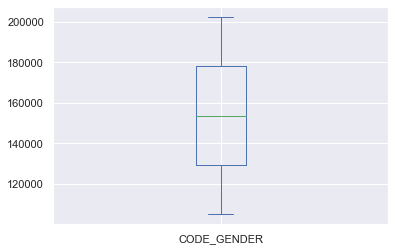

In [103]:
app_df.CODE_GENDER.value_counts().plot.box(); # No outlier found the data is fine.

### FLAG_OWN_REALTY vs FLAG_OWN_CAR

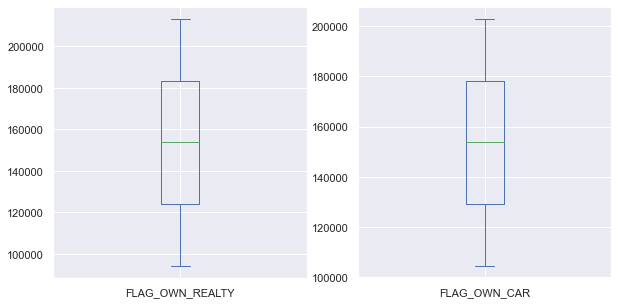

In [104]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
app_df.FLAG_OWN_REALTY.value_counts().plot.box();
plt.subplot(1,2,2)
app_df.FLAG_OWN_CAR.value_counts().plot.box();

### CNT_CHILDREN

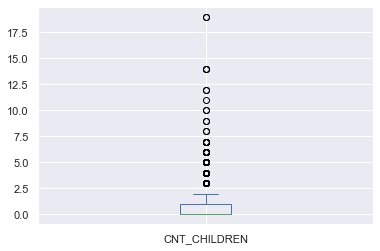

In [105]:
app_df.CNT_CHILDREN.plot.box()
plt.show()

In [106]:
app_df["CNT_CHILDREN"]>2.5   

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507    False
307508    False
307509    False
307510    False
Name: CNT_CHILDREN, Length: 307511, dtype: bool

In [107]:
app_df.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [108]:
app_df[app_df["CNT_CHILDREN"]<15].CNT_CHILDREN 

0         0
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    0
307510    0
Name: CNT_CHILDREN, Length: 307509, dtype: int64

In [109]:
#UPPER= Q3+1.5*IQR
#lower=Q1-1.5*IQR
#Q3:- 75%TILE 
#Q1:- 25%TILE
#IQR=Q3-Q1
upper_bound=1.00+(1.5*0)
lower_bound=0+(1.5*0)
print(upper_bound)
print(lower_bound)

1.0
0.0


In [110]:
app_df["CNT_CHILDREN"].skew()  

1.9746044696947922

As per the data it is highly Skwed

**Setting the max children count to be 3** 

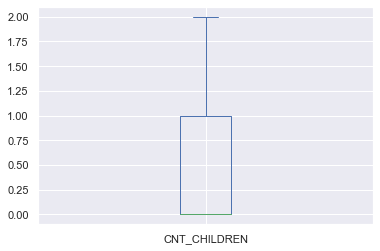

In [111]:
 app_df[app_df["CNT_CHILDREN"]< 3].CNT_CHILDREN.plot.box() ;

### OBSERVATION :- **IF I SET THE MAXIMUM TO 3 CHILDREN SO NO OUTLIERS WERE FOUND**

### Exploring the data  'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'

In [112]:
app_df.AMT_INCOME_TOTAL.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
10%      8.100000e+04
20%      9.900000e+04
30%      1.125000e+05
40%      1.350000e+05
50%      1.471500e+05
60%      1.620000e+05
70%      1.800000e+05
80%      2.250000e+05
90%      2.700000e+05
99%      4.725000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

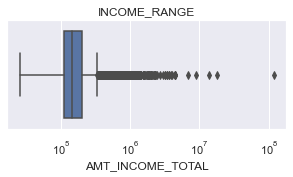

In [113]:
plt.figure(figsize=(5,2))
sns.boxplot(x="AMT_INCOME_TOTAL",data=app_df)
#df.AMT_INCOME_TOTAL.plot.box();
plt.xscale("log")
plt.title('INCOME_RANGE');


In [114]:
app_df.AMT_INCOME_TOTAL.quantile([0.75,0.80,0.90,0.99])

0.75    202500.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [115]:
app_df[app_df["AMT_INCOME_TOTAL"] < app_df.AMT_INCOME_TOTAL.quantile(0.90)].AMT_INCOME_TOTAL

0         202500.0
2          67500.0
3         135000.0
4         121500.0
5          99000.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 269523, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

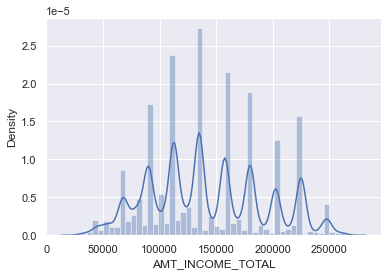

In [116]:
sns.distplot(app_df[app_df["AMT_INCOME_TOTAL"]< app_df["AMT_INCOME_TOTAL"].quantile(0.90)].AMT_INCOME_TOTAL) 

Text(0.5, 1.0, 'INCOME_RANGE')

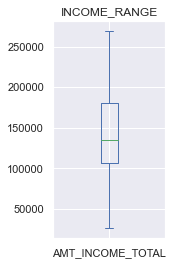

In [117]:
plt.figure(figsize=(2,4))
app_df[app_df["AMT_INCOME_TOTAL"]< app_df["AMT_INCOME_TOTAL"].quantile(0.90)].AMT_INCOME_TOTAL.plot.box();
plt.title('INCOME_RANGE')

### OBSERVATION :- Outliers were found above 90th percentile 

In [118]:
app_df["AMT_CREDIT"].describe(percentiles=[0.8,0.9,0.95,0.99])

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
50%      5.135310e+05
80%      9.000000e+05
90%      1.133748e+06
95%      1.350000e+06
99%      1.854000e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [119]:
app_df[app_df["AMT_CREDIT"] < app_df["AMT_CREDIT"].quantile(0.99)].AMT_CREDIT

0          406597.5
1         1293502.5
2          135000.0
3          312682.5
4          513000.0
            ...    
307506     254700.0
307507     269550.0
307508     677664.0
307509     370107.0
307510     675000.0
Name: AMT_CREDIT, Length: 304434, dtype: float64

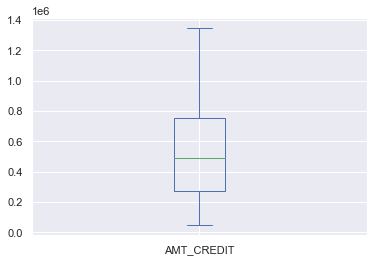

In [120]:
app_df[app_df["AMT_CREDIT"]< app_df["AMT_CREDIT"].quantile(0.95)].AMT_CREDIT.plot.box();

### Observation :- Outliers can be removed after setting the value upto 0.95 percentile

In [121]:
app_df["AMT_CREDIT"].describe(percentiles=[0.8,0.9,0.95,0.99])

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
50%      5.135310e+05
80%      9.000000e+05
90%      1.133748e+06
95%      1.350000e+06
99%      1.854000e+06
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

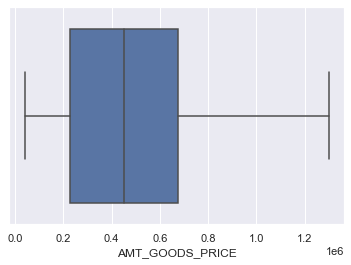

In [122]:
sns.boxplot(x=app_df[app_df["AMT_GOODS_PRICE"] < app_df["AMT_GOODS_PRICE"].quantile(0.95)].AMT_GOODS_PRICE);

### Observation :- Outliers can be removed after setting the value upto 0.95 percentile

**XNA TO REPLACE BY NOT DEFINED OR UNKNOWN BUISNESS** 

In [123]:
app_df["ORGANIZATION_TYPE"].value_counts()  

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [124]:
app_df["ORGANIZATION_TYPE"].replace("XNA","UNKNOWN",inplace=True)

In [125]:
app_df["ORGANIZATION_TYPE"]

0         Business Entity Type 3
1                         School
2                     Government
3         Business Entity Type 3
4                       Religion
                   ...          
307506                  Services
307507                   UNKNOWN
307508                    School
307509    Business Entity Type 1
307510    Business Entity Type 3
Name: ORGANIZATION_TYPE, Length: 307511, dtype: object

In [126]:
app_df["BUISNESS_TYPE"]=app_df["ORGANIZATION_TYPE"].apply(lambda x : x.split(" ")[0])

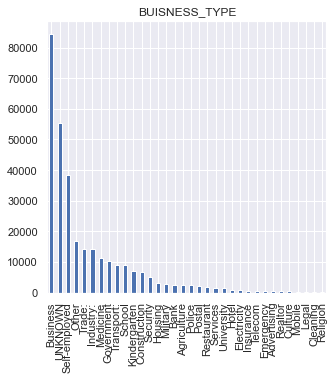

In [127]:
plt.figure(figsize=(5,5))

app_df.BUISNESS_TYPE.value_counts().plot.bar()
plt.title('BUISNESS_TYPE');

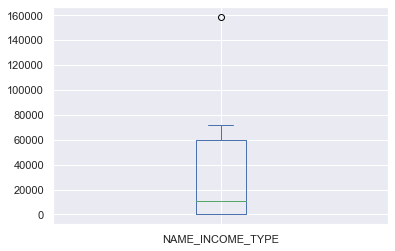

In [128]:
app_df.NAME_INCOME_TYPE.value_counts().plot.box();         

### Observation :- Outliers identified which is at the max point¶

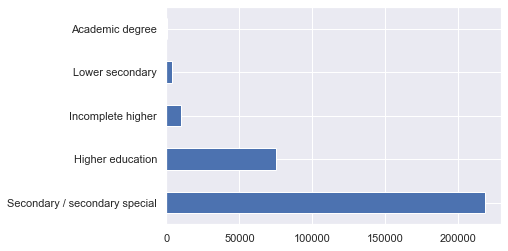

In [129]:
app_df["NAME_EDUCATION_TYPE"].value_counts().plot.barh();

### Observation:- Secondary Type of education are higest than other type of education.

In [130]:
app_df["NAME_FAMILY_STATUS"].value_counts()


Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [131]:
app_df[app_df["NAME_FAMILY_STATUS"]=="Widow"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_ID_PUBLISHED,YEAR_REGISTRATION,BUISNESS_TYPE
18,100022,0,Revolving loans,F,N,Y,0,112500.0,157500.0,7875.0,157500.0,Other_A,Working,Secondary / secondary special,Widow,House / apartment,0.046220,Laborers,1.0,FRIDAY,13,0,0,0,0,0,0,Housing,0.556727,-239.0,0.0,0.0,0.0,0.0,0.0,0.0,48.542466,21.380822,3.449315,23.975342,Housing
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,Cooking staff,1.0,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.190706,-161.0,0.0,0.0,0.0,0.0,2.0,2.0,51.298630,7.200000,5.005479,18.008219,Business
59,100070,0,Cash loans,M,Y,Y,0,540000.0,1227901.5,46899.0,1129500.0,Unaccompanied,Working,Higher education,Widow,House / apartment,0.032561,Managers,1.0,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.339288,-1377.0,0.0,0.0,0.0,0.0,0.0,0.0,56.284932,5.728767,1.550685,18.756164,Business
74,100086,0,Cash loans,F,N,Y,1,135000.0,675000.0,21775.5,675000.0,Unaccompanied,Commercial associate,Higher education,Widow,House / apartment,0.019101,Laborers,2.0,THURSDAY,12,0,0,0,0,0,0,Self-employed,0.198620,-1597.0,0.0,0.0,0.0,1.0,4.0,2.0,39.079452,6.827397,12.375342,11.854795,Self-employed
99,100118,0,Cash loans,F,N,Y,0,90000.0,675000.0,26541.0,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.026392,Laborers,1.0,TUESDAY,15,0,0,0,0,0,0,UNKNOWN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,1.0,61.564384,1000.665753,11.843836,0.594521,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307402,456135,0,Revolving loans,F,N,Y,0,157500.0,382500.0,19125.0,382500.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.028663,Laborers,1.0,TUESDAY,14,0,0,0,0,0,0,UNKNOWN,0.644679,-633.0,0.0,0.0,0.0,0.0,0.0,6.0,61.791781,1000.665753,11.098630,0.164384,UNKNOWN
307403,456136,0,Cash loans,F,N,Y,0,270000.0,254700.0,14751.0,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Widow,House / apartment,0.032561,Managers,1.0,SATURDAY,11,0,0,0,0,0,0,School,0.723837,-2897.0,0.0,0.0,0.0,1.0,0.0,3.0,66.260274,8.115068,11.501370,18.068493,School
307406,456139,0,Cash loans,F,N,Y,0,90000.0,203760.0,13747.5,180000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.019689,Laborers,1.0,MONDAY,14,0,0,0,0,0,0,UNKNOWN,0.484851,-1696.0,0.0,0.0,0.0,0.0,0.0,2.0,63.945205,1000.665753,10.909589,21.649315,UNKNOWN
307450,456188,0,Cash loans,F,N,Y,0,54000.0,315000.0,21924.0,315000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,Municipal apartment,0.006207,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,UNKNOWN,0.535276,-2950.0,0.0,0.0,0.0,0.0,0.0,1.0,55.786301,1000.665753,9.947945,26.961644,UNKNOWN


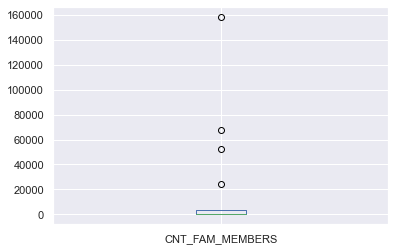

In [132]:
app_df["CNT_FAM_MEMBERS"].value_counts().plot.box();

### Observation :- Few Outliers are found which at different points and maxium extends upto the 160000

In [133]:
app_df["CNT_FAM_MEMBERS"].describe()

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [134]:
IQR=3.00-2.00
print("IQR: ",IQR)
UPPER_BOUND=3-(1.5*1)             #Q3+1.5*IQR
print("UPPER_BOUND:",UPPER_BOUND)
LOWER_BOUND=2-(1.5*1)             #Q3+1.5*IQR
print("LOWER_BOUND:",LOWER_BOUND)

IQR:  1.0
UPPER_BOUND: 1.5
LOWER_BOUND: 0.5


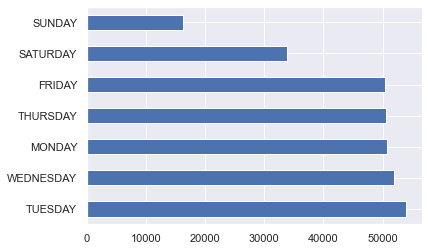

In [135]:
app_df["WEEKDAY_APPR_PROCESS_START"].value_counts().plot.barh();

### Observation :- Tuesdays ,Wednesday and Monday are the time people are applying more  loans

## Univarient analysis

In [136]:
app_df.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

<AxesSubplot:xlabel='TARGET', ylabel='count'>

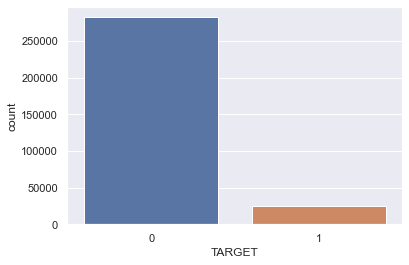

In [137]:
sns.countplot(data=app_df,x="TARGET")      

### Observation :- IN THIS PLOT OF TARGET ANALYSIS IT IS IDENTIFIED THAT THERE ARE LESS DEFAULTERS

In [138]:
app_df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

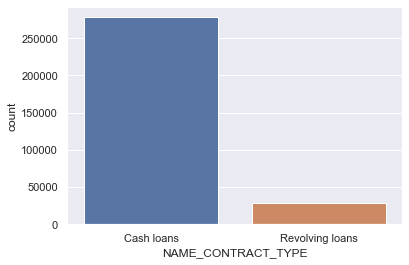

In [139]:
sns.countplot(data=app_df,x="NAME_CONTRACT_TYPE");

### Observation :- CASH LOANS ARE MORE IN COMPARISON OF REVLOVING LOANS

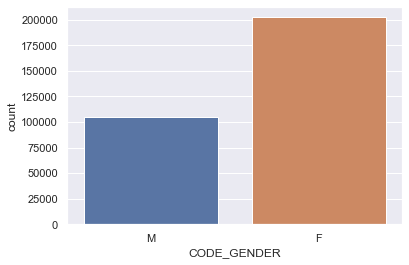

In [140]:
sns.countplot(data=app_df,x="CODE_GENDER");

   **THE NUMBER OF FEMALES ARE MORE IN COMPARION TO NUMBER OF MALE IN TAKING LOANS**  

### Observation :- THE NUMBER OF FEMALES ARE MORE IN COMPARISON TO  MALE IN TAKING LOANS

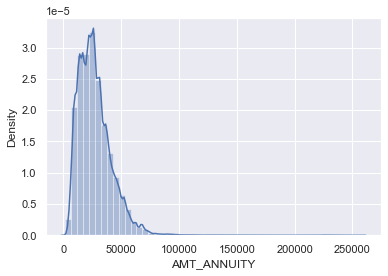

In [141]:
sns.distplot(x=app_df["AMT_ANNUITY"])
plt.xlabel("AMT_ANNUITY");

In [142]:
app_df["AMT_ANNUITY"].skew()

1.5798237246955467

In [143]:
app_df["AMT_ANNUITY"].describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

### Observation :- The AMT_ANNUITY the max Density  is approx 25000  

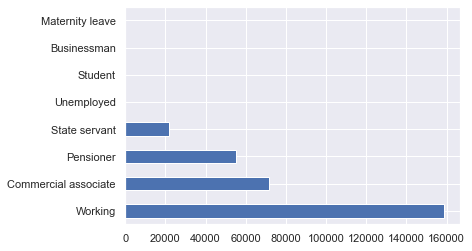

In [144]:
app_df["NAME_INCOME_TYPE"].value_counts().plot.barh();

Observation : - Working category has more income than any other type of income

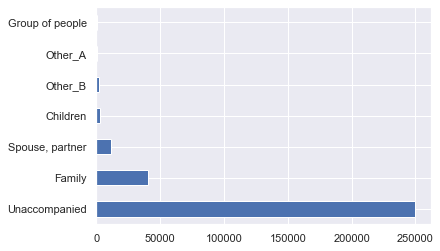

In [145]:
app_df["NAME_TYPE_SUITE"].value_counts().plot.barh();

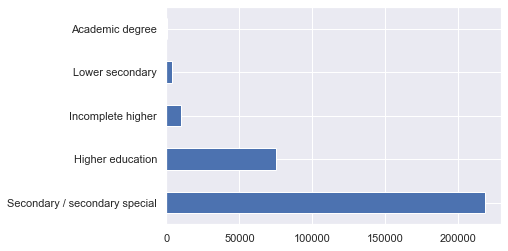

In [146]:
app_df['NAME_EDUCATION_TYPE'].value_counts().plot.barh(); 

### Observation :- People with higher secondary school are more in comparison to others

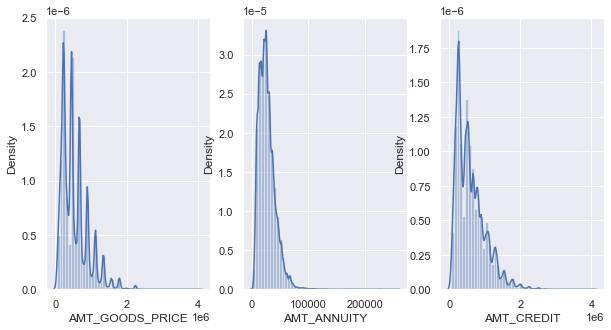

In [147]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.distplot(app_df["AMT_GOODS_PRICE"])

plt.subplot(1,3,2)

sns.distplot(app_df["AMT_ANNUITY"])

plt.subplot(1,3,3)

sns.distplot(app_df["AMT_CREDIT"]);

In [148]:
print(app_df["AMT_CREDIT"].skew())
print(app_df["AMT_ANNUITY"].skew())
print(app_df["AMT_GOODS_PRICE"].skew())

1.2347784971349398
1.5798237246955467
1.350142549635089


In [149]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEAR_BIRTH', 'YEAR_EMPLOYED',
       'YEAR_ID_PUBLISHED', 'YEAR_REGISTRATION', 'B

<AxesSubplot:xlabel='REGION_POPULATION_RELATIVE', ylabel='Density'>

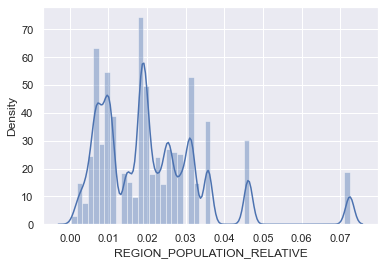

In [150]:
sns.distplot(app_df["REGION_POPULATION_RELATIVE"])

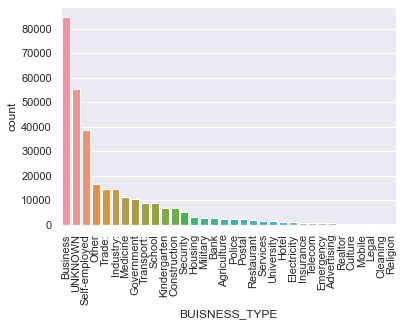

In [151]:
sns.countplot(data=app_df, x="BUISNESS_TYPE", order=app_df["BUISNESS_TYPE"].value_counts().index)
# Rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

### Observation:- Business is more followed by Unknown and self employed

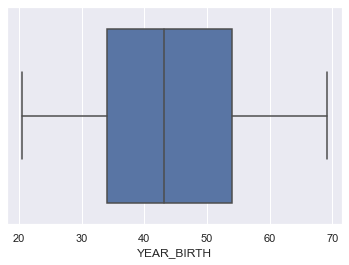

In [152]:
# Year_ of _ Birth 
sns.boxplot(app_df["YEAR_BIRTH"]);   
# No outliers found in this data  

In [153]:
app_df["WEEKDAY_APPR_PROCESS_START"]

0         WEDNESDAY
1            MONDAY
2            MONDAY
3         WEDNESDAY
4          THURSDAY
            ...    
307506     THURSDAY
307507       MONDAY
307508     THURSDAY
307509    WEDNESDAY
307510     THURSDAY
Name: WEEKDAY_APPR_PROCESS_START, Length: 307511, dtype: object

## BIVARIANT ANALYSIS

In [154]:
set(app_df.describe().columns)

{'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE',
 'EXT_SOURCE_3',
 'HOUR_APPR_PROCESS_START',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REGION_POPULATION_RELATIVE',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'SK_ID_CURR',
 'TARGET',
 'YEAR_BIRTH',
 'YEAR_EMPLOYED',
 'YEAR_ID_PUBLISHED',
 'YEAR_REGISTRATION'}

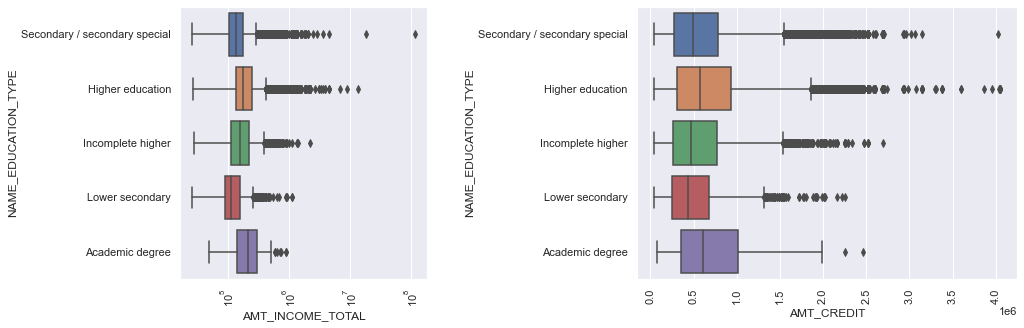

In [155]:
# NAME_EDUCATION_TYPE vs "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY"
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="AMT_INCOME_TOTAL",y="NAME_EDUCATION_TYPE",data=app_df)
plt.xscale("log")
plt.xticks(rotation=90);
plt.subplot(1,2,2)
sns.boxplot(x="AMT_CREDIT",y="NAME_EDUCATION_TYPE",data=app_df)
plt.xticks(rotation=90);

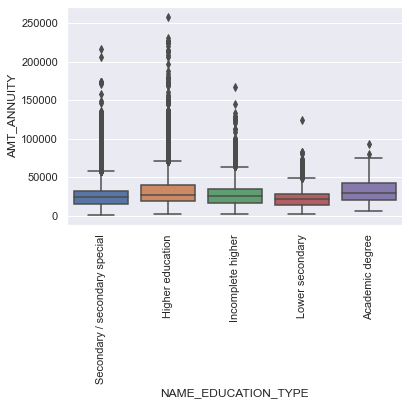

In [156]:
sns.boxplot(x="NAME_EDUCATION_TYPE",y="AMT_ANNUITY",data=app_df)
plt.xticks(rotation=90);

### Observation :- PEOPLE WITH ACMEDIC DEGREE HAVE MORE INCOME AS COMPARE TO PEOPLE WITH LOWER SECONDARY HAVE LESS INCOME¶

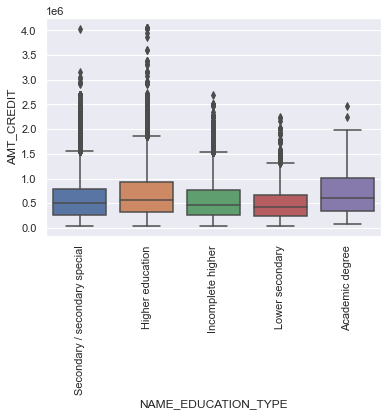

In [157]:
sns.boxplot(x="NAME_EDUCATION_TYPE",y="AMT_CREDIT",data=app_df)
plt.xticks(rotation=90);

### Obervation :- Buisness, religion, construction ,military,legal are few occupation with high income range

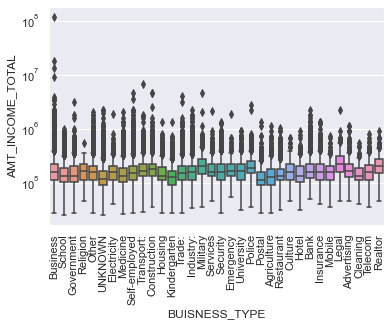

In [158]:
# AMT_INCOME_TOTAL vs Buisness_type
sns.boxplot(x="BUISNESS_TYPE",y="AMT_INCOME_TOTAL",data=app_df)
plt.yscale("log")
plt.xticks(rotation=90);

### Obervation :- Buisness, religion, construction ,military,legal are few occupation with high income range

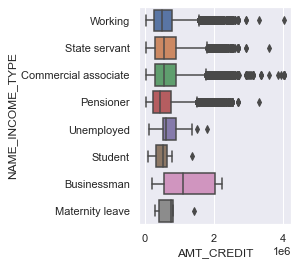

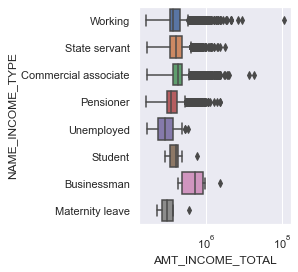

In [159]:
#NAME_INCOME_TYPE & AMT_CREDIT & AMT_INCOME_TOTAL
plt.subplot(1,2,1)
sns.boxplot(data=app_df, y ="NAME_INCOME_TYPE", x= "AMT_CREDIT")
plt.show()
plt.subplot(1,2,2)
sns.boxplot(data=app_df, y ="NAME_INCOME_TYPE", x= "AMT_INCOME_TOTAL")
plt.xscale("log")
plt.show()

### Observation :- Clearly the buisness Income type is dominaing the other buisness types with working which as a verity of range,

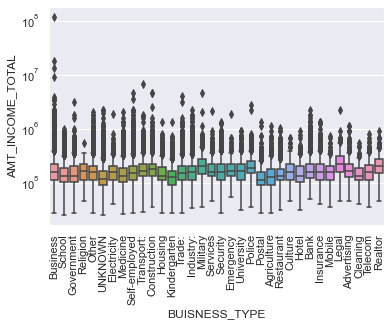

In [160]:
# AMT_INCOME_TOTAL vs Buisness_type
sns.boxplot(x="BUISNESS_TYPE",y="AMT_INCOME_TOTAL",data=app_df);
plt.yscale("log");
plt.xticks(rotation=90);

In [161]:
app_df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

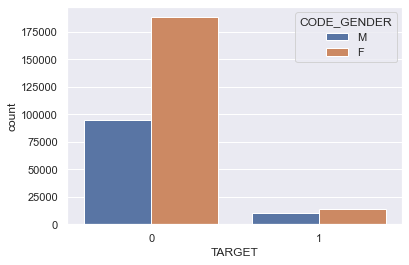

In [162]:
sns.countplot(x="TARGET",data=app_df,hue="CODE_GENDER") ; 

### Observation :- Female applicants are more in comparison to male applicants¶

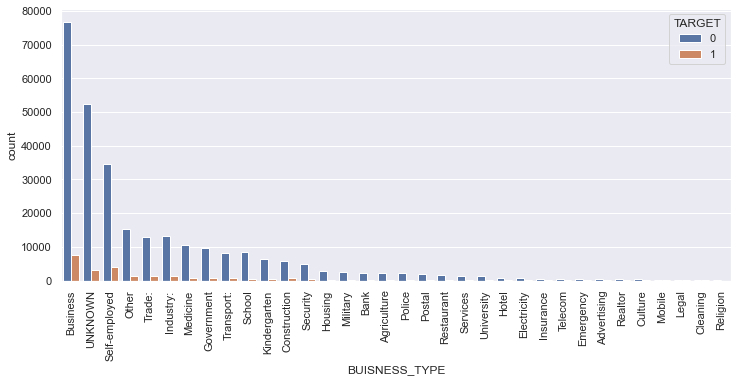

In [163]:
plt.figure(figsize=(12,5))
sns.countplot(x="BUISNESS_TYPE", data=app_df, hue="TARGET", order=app_df["BUISNESS_TYPE"].value_counts().index)
plt.xticks(rotation=90);

### Observation: Business types are the best target customer followed by Unknown and Self- Employed

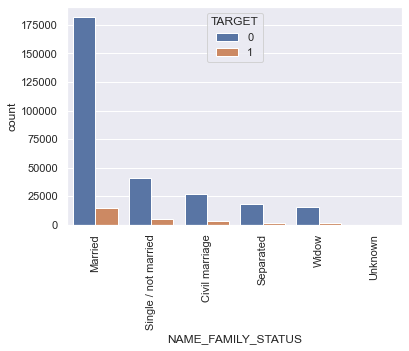

In [164]:
sns.countplot(x="NAME_FAMILY_STATUS",data=app_df,hue="TARGET", order=app_df["NAME_FAMILY_STATUS"].value_counts().index)
plt.xticks(rotation=90);

### Observation : Married and single are top 2 category to target which has highest no. of non defaulters

In [165]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEAR_BIRTH', 'YEAR_EMPLOYED',
       'YEAR_ID_PUBLISHED', 'YEAR_REGISTRATION', 'B

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

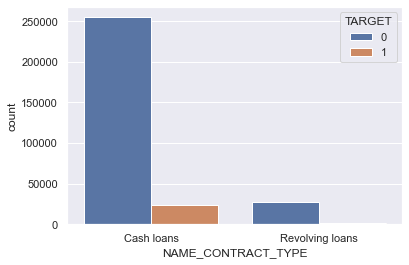

In [166]:
sns.countplot(x="NAME_CONTRACT_TYPE",data=app_df,hue="TARGET")

Observstion:- Cash loans have more non defaulters than revolving loans

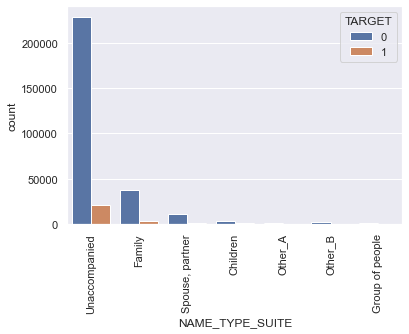

In [167]:
sns.countplot(x="NAME_TYPE_SUITE",data=app_df,hue="TARGET")
plt.xticks(rotation=90);

### Observation :- Unaccompanied and family are the people who haveless  defaulters than other category

In [168]:
app_df["YEAR_BIRTH"].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: YEAR_BIRTH, dtype: float64

In [169]:
round(app_df["YEAR_BIRTH"].value_counts(ascending=False))

37.668493    43
36.934247    42
49.994521    41
27.452055    41
43.208219    40
             ..
68.213699     1
68.131507     1
21.964384     1
68.761644     1
68.660274     1
Name: YEAR_BIRTH, Length: 17460, dtype: int64

#### BINNING THE AGE TO IDENTIFY THE BEST AGE RANGE

In [170]:
bins = [0,20,40,60,80] 
slot = ["0-20", "20-40", "40-60", "60-80"] 
app_df['Age_Range']=pd.cut(app_df['YEAR_BIRTH'],bins,labels=slot,ordered=False)

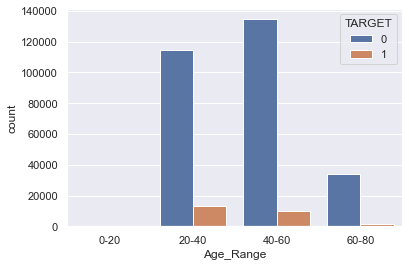

In [171]:
sns.countplot(x="Age_Range",data=app_df,hue="TARGET");


### Observation :- FROM THE AGE RANGE OF 20-40 THE DEFAULTERS ARE MORE IN COMPARISON TO OTHER AGE RANGE, HOWEVER THE LEAST DEAULTERS 40-60 AGE GROUP HAS HIGH LOAN CLEARENCE RATE

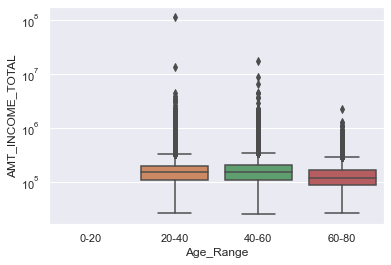

In [172]:
sns.boxplot(x="Age_Range",data=app_df,y="AMT_INCOME_TOTAL")
plt.yscale("log")

### Observation :- The Age Ranging form 20-40 and 40-60 have nearly same income.

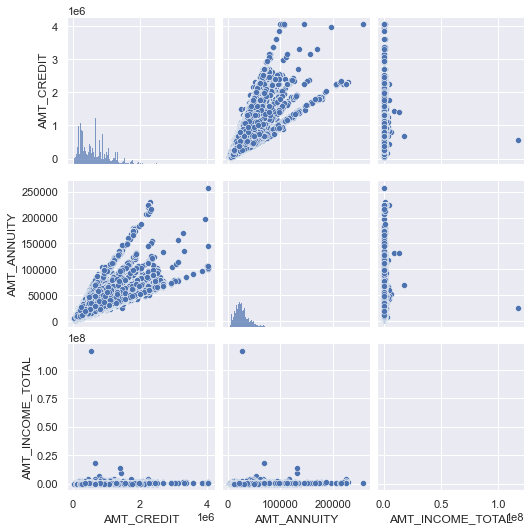

In [173]:
sns.pairplot(data=app_df , vars= ["AMT_CREDIT" ,"AMT_ANNUITY", "AMT_INCOME_TOTAL"])

**Observation :-**
1) AMT_CREDIT and AMT_ANNUITY are directly proportional to each other

2) AMT_INCOME_TOTAL AND AMT_ANNUITY AND AMT_CREDIT there is not much difference in each chart

### SEGMENTED VARIABLE

DATA IMBALANCE

In [174]:
app_df["TARGET"].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

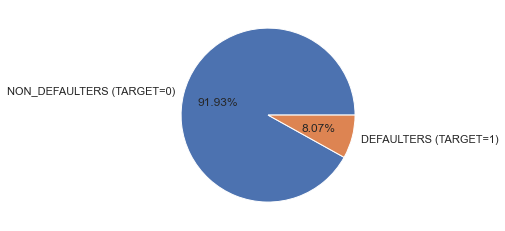

In [175]:
plt.pie(app_df['TARGET'].value_counts(),labels=['NON_DEFAULTERS (TARGET=0)','DEFAULTERS (TARGET=1)'], autopct = '%2.2f%%');

### Observation :-We can see there is a huge difference in the data

In [176]:
NON_DEFAULTERS=app_df[app_df["TARGET"]==0]

In [177]:
DEFAULTERS=app_df[app_df["TARGET"]==1]

In [178]:
NON_DEFAULTERS.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_ID_PUBLISHED,YEAR_REGISTRATION,BUISNESS_TYPE,Age_Range
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,0.535276,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,0.797260,3.249315,School,40-60
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438,6.934247,11.671233,Government,40-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.535276,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,52.068493,8.326027,6.676712,26.939726,Business,40-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.535276,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288,9.473973,11.810959,Religion,40-60
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,Laborers,2.0,WEDNESDAY,16,0,0,0,0,0,0,Other,0.621226,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,46.413699,4.350685,1.306849,13.616438,Other,40-60


In [179]:
DEFAULTERS.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_ID_PUBLISHED,YEAR_REGISTRATION,BUISNESS_TYPE,Age_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.139376,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,5.808219,9.994521,Business,20-40
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,Cooking staff,1.0,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.190706,-161.0,0.0,0.0,0.0,0.0,2.0,2.0,51.298630,7.200000,5.005479,18.008219,Business,40-60
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,Laborers,2.0,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.320163,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0,47.895890,3.457534,2.819178,3.238356,Business,40-60
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,Sales staff,2.0,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.399676,-1480.0,0.0,0.0,0.0,0.0,0.0,2.0,36.668493,9.854795,12.079452,0.123288,Self-employed,20-40
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,Laborers,2.0,THURSDAY,10,0,0,0,0,0,0,UNKNOWN,0.720944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.928767,1000.665753,11.504110,14.769863,UNKNOWN,60-80


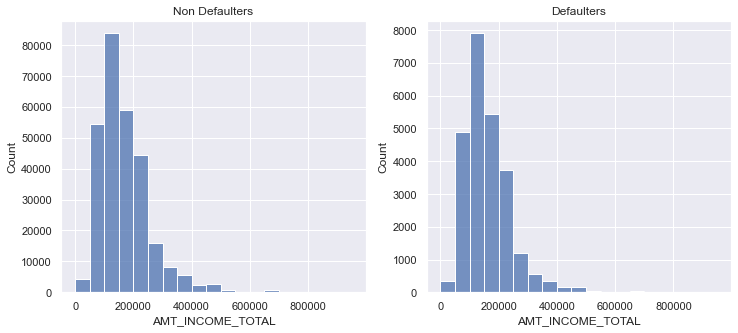

In [180]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
bins=[i for i in range( 0, 1000000, 50000)]
sns.histplot(NON_DEFAULTERS["AMT_INCOME_TOTAL"], bins=bins)
plt.title('Non Defaulters')

plt.subplot(1,2,2)
bins=[i for i in range( 0, 1000000, 50000)]
sns.histplot(DEFAULTERS["AMT_INCOME_TOTAL"], bins=bins)
plt.title('Defaulters');

### CONLUSION:- NOT MUCH DIFFERENCE IS FOUND IN THE TWO DATA THE INCOME IS MAXIMUM FOR BOTH THE TARGET VARIABLES AS 100000

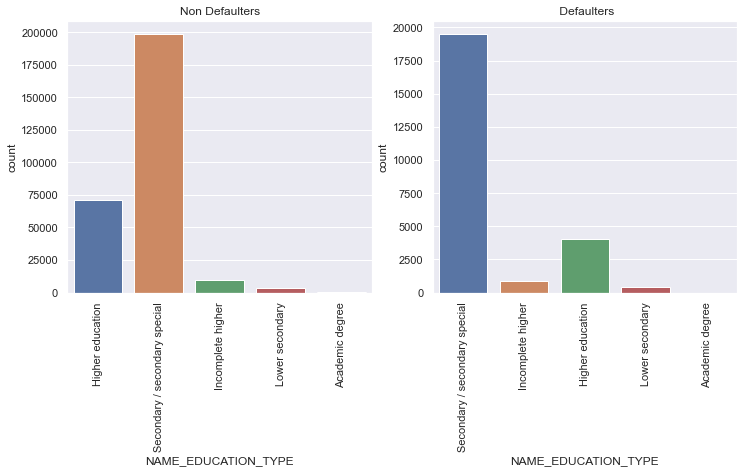

In [181]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=NON_DEFAULTERS,x="NAME_EDUCATION_TYPE")
plt.xticks(rotation=90);
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.countplot(data=DEFAULTERS,x="NAME_EDUCATION_TYPE")
plt.xticks(rotation=90);
plt.title(' Defaulters');

### Observation :- IN THE DEFALUTER RATE OF SECONDARY /SECONDARY SECIAL IS MORE IN COMPARISON TO OTHERS , ACADEMIC DEGREE HOLDERS HAVE LESS DEFAULTERS

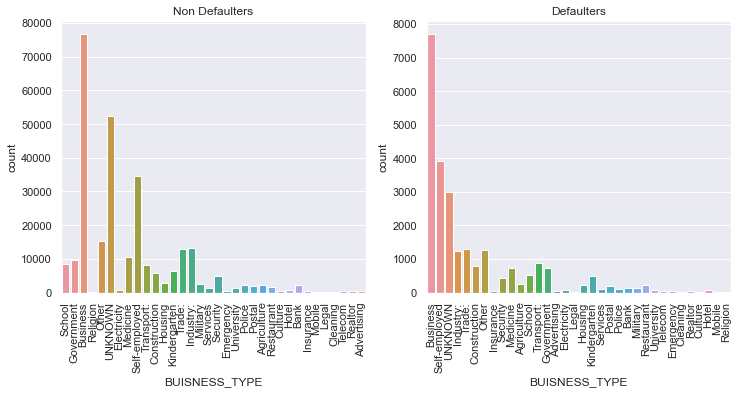

In [182]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=NON_DEFAULTERS,x="BUISNESS_TYPE")
plt.xticks(rotation=90);
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.countplot(data=DEFAULTERS,x="BUISNESS_TYPE")
plt.xticks(rotation=90);
plt.title('Defaulters');

### Observation :- TOP 3 non defaulters and non defaluters fall under the same buisness type Buisness , Self Employed and Unknown

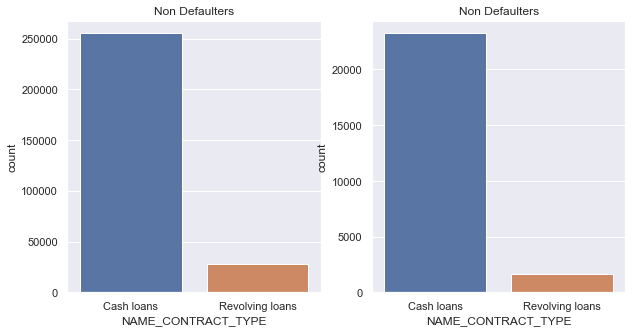

In [183]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=NON_DEFAULTERS,x="NAME_CONTRACT_TYPE")
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.countplot(data=DEFAULTERS,x="NAME_CONTRACT_TYPE")
plt.title('Non Defaulters');

### CONCUSION :- CASH LOANS ARE MORE IN IN BOTH THE CASES DEFAULTERS AS WELL AS NON DEFAULTERS

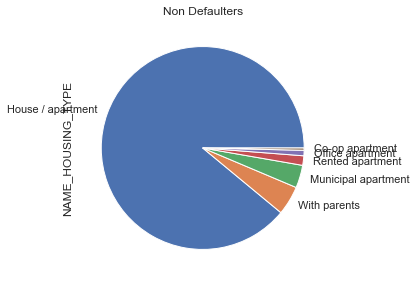

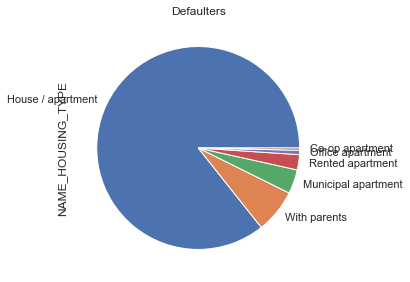

In [184]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
NON_DEFAULTERS["NAME_HOUSING_TYPE"].value_counts(normalize=True).plot.pie()
plt.title('Non Defaulters')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
DEFAULTERS["NAME_HOUSING_TYPE"].value_counts(normalize=True).plot.pie()
plt.title('Defaulters')
plt.show()

### Observatioin :-Clients living in a House/Apartments are more likely to apply and repay the loan

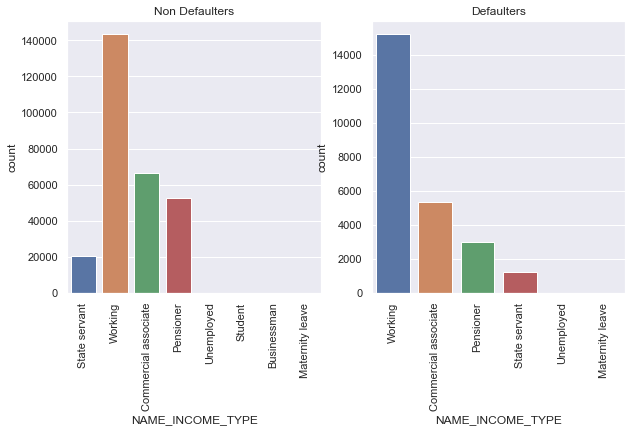

In [185]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=NON_DEFAULTERS,x="NAME_INCOME_TYPE")
plt.xticks(rotation=90);
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.countplot(data=DEFAULTERS,x="NAME_INCOME_TYPE")
plt.xticks(rotation=90);
plt.title('Defaulters');


### Observation :- STUDENTS AND BUISNESSMAN ARE HAVING NO PAYMENT DIFFICLTY BECAUSE THEY ARE NOT IN THE LIST OF DEFAULTERS

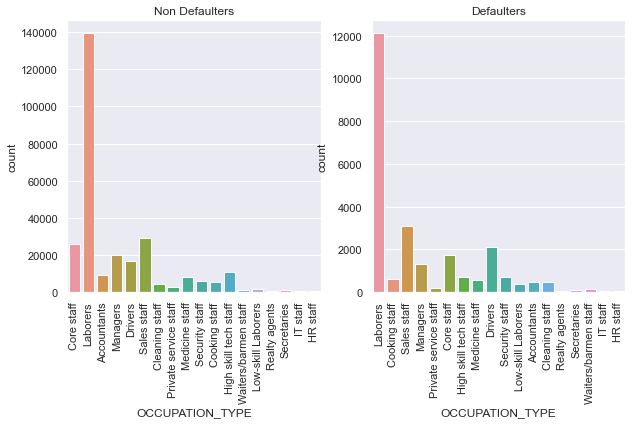

In [186]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=NON_DEFAULTERS,x="OCCUPATION_TYPE")
plt.xticks(rotation=90);
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.countplot(data=DEFAULTERS,x="OCCUPATION_TYPE")
plt.xticks(rotation=90);
plt.title('Defaulters');

### Observation:- Sales staff, Core Staff , Drivers have more no of defaluter rate as compared to the non defaluter rate

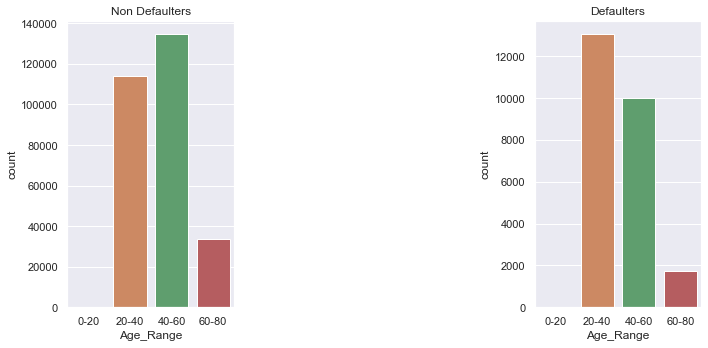

In [187]:
plt.figure(figsize=(10, 5))

# First subplot for non-defaulters
plt.subplot(1, 3, 1)
sns.countplot(data=NON_DEFAULTERS, x="Age_Range")
plt.title('Non Defaulters')

# Second subplot for defaulters
plt.subplot(1, 3, 3)
sns.countplot(data=DEFAULTERS, x="Age_Range")
plt.title('Defaulters')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

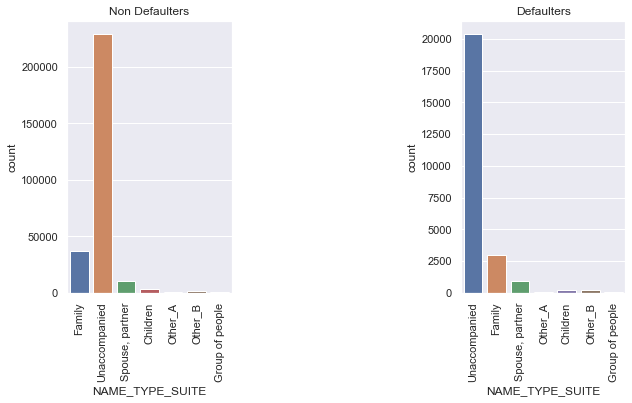

In [188]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
sns.countplot(x="NAME_TYPE_SUITE",data=NON_DEFAULTERS)
plt.title('Non Defaulters')

plt.xticks(rotation=90);
plt.subplot(1,3,3)
sns.countplot(x="NAME_TYPE_SUITE",data=DEFAULTERS)
plt.xticks(rotation=90);
plt.title('Defaulters');


### Observation:- Sales staff, Core Staff , Drivers have more no of defaluter rate as compared to the non defaluter rate

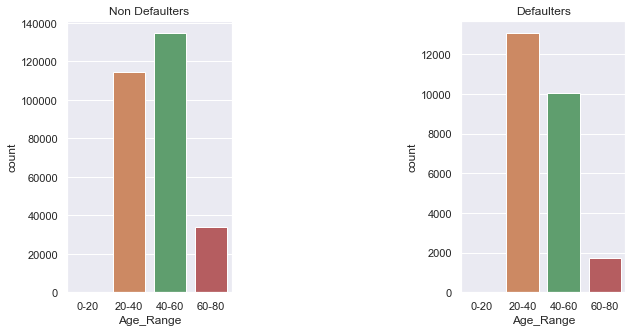

In [189]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(data=NON_DEFAULTERS,x="Age_Range")
plt.title('Non Defaulters')


plt.subplot(1,3,3)
sns.countplot(data=DEFAULTERS,x="Age_Range")
plt.title('Defaulters');

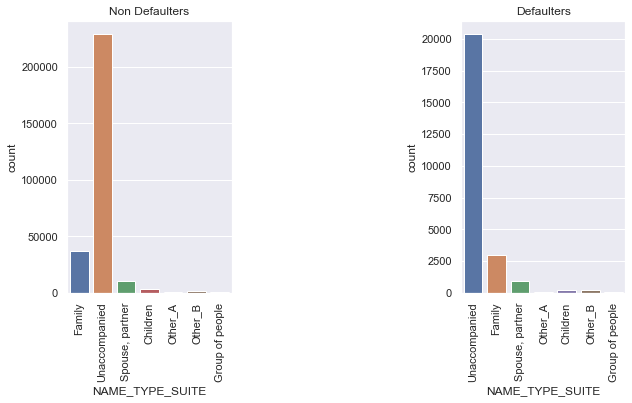

<Figure size 720x360 with 0 Axes>

In [190]:
###Obervation :- THE AGE RANGE FORM 20-40 HAVE THE HGHEST RATE OF DEFAULTERS WHEREAS THE AGE RANGE OF 40-60 HAVE THE HIGHEST RANGE OF NON DEFAULTERS

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x="NAME_TYPE_SUITE",data=NON_DEFAULTERS)
plt.title('Non Defaulters')

plt.xticks(rotation=90);
plt.subplot(1,3,3)
sns.countplot(x="NAME_TYPE_SUITE",data=DEFAULTERS)
plt.xticks(rotation=90);
plt.title('Defaulters')

plt.figure(figsize=(10,5));

### Conlusion:- Since the number of unaccompained are more there for the number of defaulters and non defaulters are also more

In [191]:
NON_DEFAULTERS.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEAR_BIRTH',
       'YEAR_EMPLOYED', 'YEAR_ID_PUBLISHED', 'YEAR_REGISTRATION'],
      dtype='object')

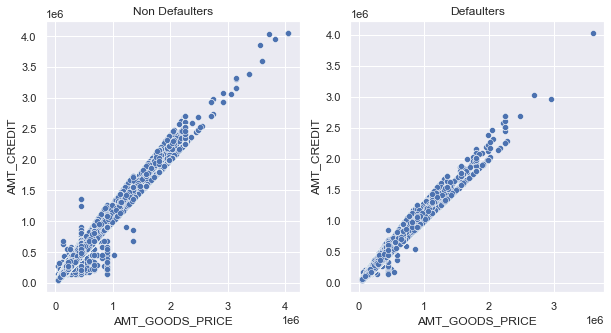

In [192]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(x="AMT_GOODS_PRICE",y="AMT_CREDIT",data=NON_DEFAULTERS)
plt.title('Non Defaulters')

plt.subplot(1,2,2)
sns.scatterplot(x="AMT_GOODS_PRICE",y="AMT_CREDIT",data=DEFAULTERS)
plt.title('Defaulters');

### Observation :- It is seen that the as the Goods Price Increses the Amt_Credit also increases in other

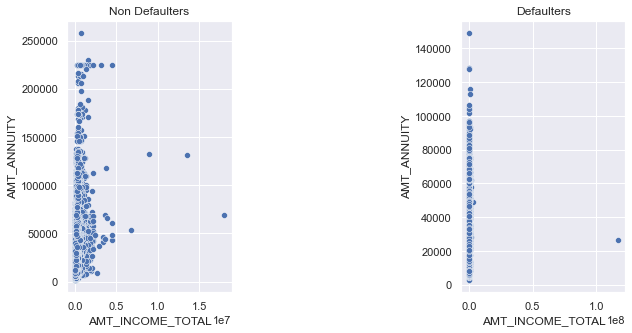

In [193]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.scatterplot(x="AMT_INCOME_TOTAL",y="AMT_ANNUITY",data=NON_DEFAULTERS)
plt.title('Non Defaulters')
plt.subplot(1,3,3)
sns.scatterplot(x="AMT_INCOME_TOTAL",y="AMT_ANNUITY",data=DEFAULTERS)
plt.title('Defaulters');

# MULTIVARIATE ANALYSIS
#### CHECKING For Co-relation ALL THE NUMERIC VARIABLE AT ONES 


In [194]:
app_df_heat=app_df.corr()

In [195]:
app_df_heat.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEAR_BIRTH,YEAR_EMPLOYED,YEAR_ID_PUBLISHED,YEAR_REGISTRATION
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000431,-0.000258,0.000849,-0.002895,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000184,-0.000859,-0.002517,-0.002066,0.001879,0.000328,0.000809,0.004071,0.001500,0.001369,0.000384,0.000973
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012815,-0.039623,-0.037227,0.009308,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.155892,0.055218,-0.000074,0.001701,-0.001306,-0.014794,-0.005833,0.012161,-0.078239,-0.047046,-0.051457,-0.041975
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021377,-0.001856,-0.025573,0.879160,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,-0.039543,-0.005866,0.000159,0.000107,-0.001083,-0.007983,-0.004913,-0.034874,-0.330938,-0.241583,0.028019,-0.183395
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159632,0.074796,0.016341,0.036459,0.031191,0.062340,0.058059,0.003574,0.006431,0.008285,-0.030737,-0.018585,0.001432,0.003481,0.003950,0.026746,0.007924,0.015821,-0.027261,-0.063835,-0.008506,-0.027805
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770127,0.986734,0.099738,0.063160,0.052738,0.024010,0.051929,0.052609,-0.026886,-0.018856,0.000081,0.036640,-0.073702,-0.002366,0.005028,0.001634,0.055536,0.020379,-0.036634,0.055436,-0.064319,0.006575,-0.009621


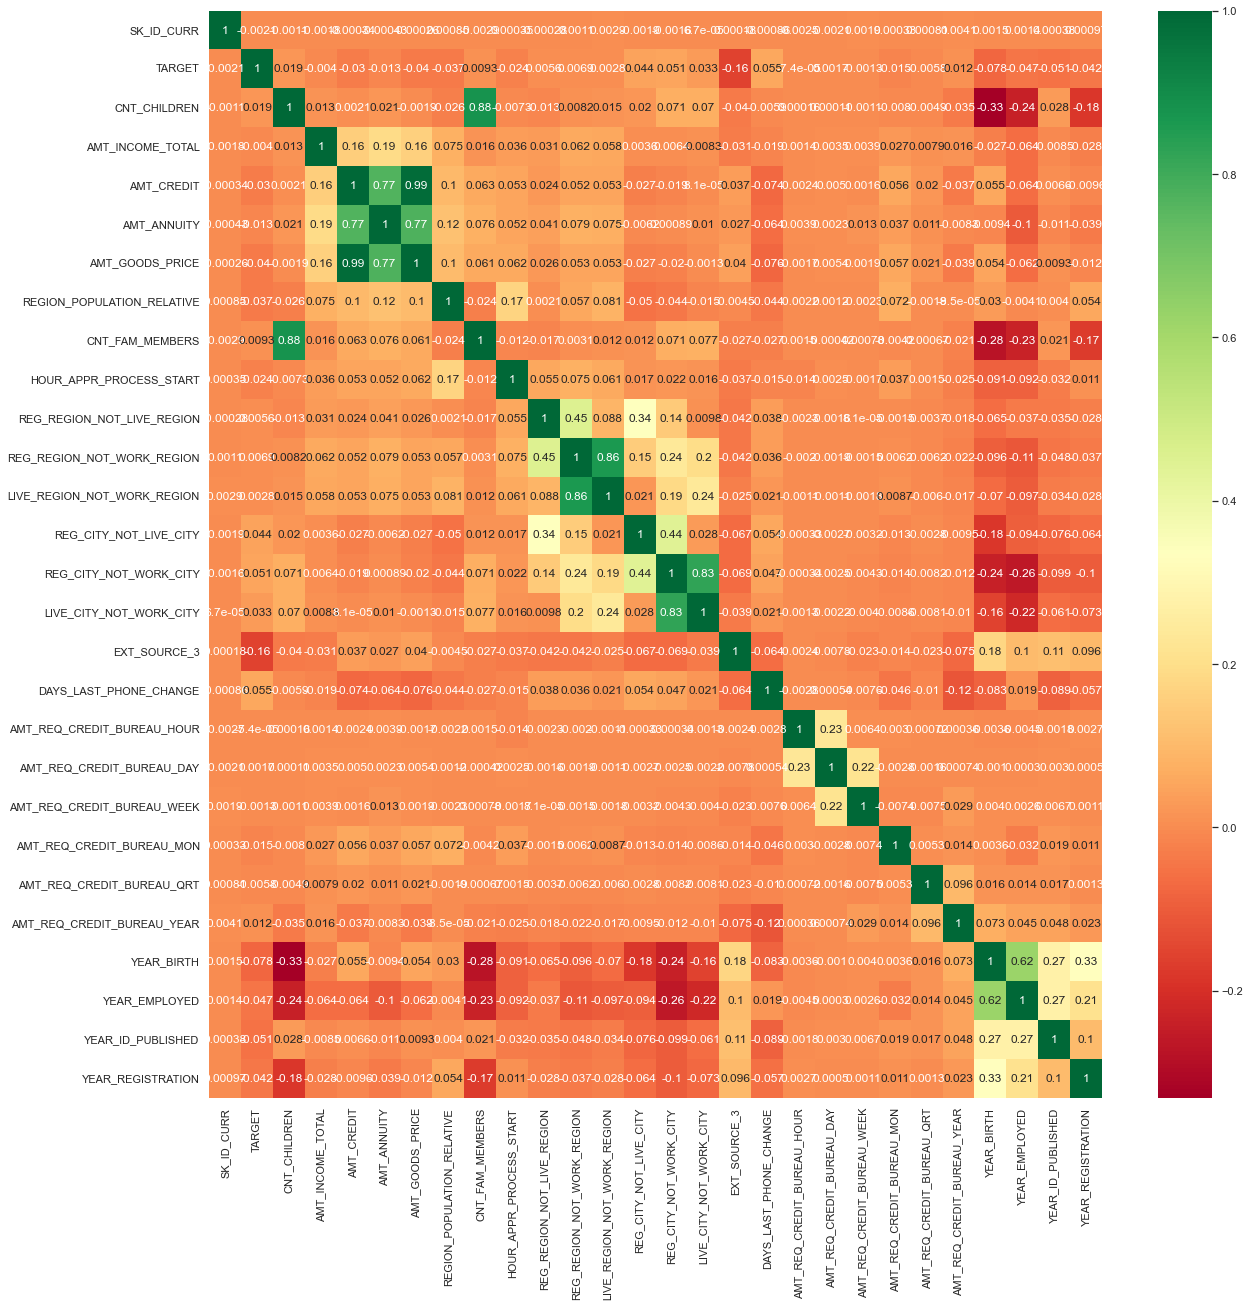

In [196]:
plt.figure(figsize=(20,20))

sns.heatmap(app_df_heat,cmap="RdYlGn",annot=True);

In [197]:
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
prev_df.shape

(1670214, 37)

In [199]:
# Checking for null values 
previous_null=(prev_df.isnull().mean().sort_values(ascending=False)) * 100
previous_null

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [200]:
previous_drop=previous_null[previous_null>=50].index
previous_drop.tolist()

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT']

In [201]:
prev_df.drop(previous_drop,axis=1,inplace=True)

#### These 4 columns need to be droped because:
#### 1) FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY" ,These two of the columns are flag variable which has binary values and no relation with the target variable hance can be dropped 
#### 2) WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START", these Two columns have no relation with the target varibale hanced can be dropped 

In [202]:
#
previous_drop2=["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY"]

**previous_drop2 is not give such insights or not valuable column so we need to drop it**

In [203]:
prev_df.drop(previous_drop2,axis=1,inplace=True)

In [204]:
prev_df.isnull().mean().sort_values(ascending=False) * 100

NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
CHANNEL_TYPE                  0.000000
NAME_YIELD_GROUP              0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
SK_ID_PREV                    0.000000
NAME_PRODUCT_TYPE             0.000000
NAME_PORTFOLIO                0.000000
SK_ID_CURR                    0.000000
NAME_CLIENT_TYPE              0.000000
CODE_REJECT_REASON            0.000000
NAME_PAYMENT_TYPE             0.000000
DAYS_DECISION                 0.000000
NAME_CONTRACT_STATUS          0.000000
NAME_CASH_LOAN_PURPOSE   

## CHECKING DATA FRAME AND HANDLING MISSING VALUES AND OBSERVING OUTLIERS

#### CHECKING FOR NEGATIVE VALUE IN THE DATA FRAME 

In [205]:
for column_name,data in prev_df.iteritems():
    print(column_name ," :::: ",data[0])

SK_ID_PREV  ::::  2030495
SK_ID_CURR  ::::  271877
NAME_CONTRACT_TYPE  ::::  Consumer loans
AMT_ANNUITY  ::::  1730.43
AMT_APPLICATION  ::::  17145.0
AMT_CREDIT  ::::  17145.0
AMT_GOODS_PRICE  ::::  17145.0
NAME_CASH_LOAN_PURPOSE  ::::  XAP
NAME_CONTRACT_STATUS  ::::  Approved
DAYS_DECISION  ::::  -73
NAME_PAYMENT_TYPE  ::::  Cash through the bank
CODE_REJECT_REASON  ::::  XAP
NAME_TYPE_SUITE  ::::  nan
NAME_CLIENT_TYPE  ::::  Repeater
NAME_GOODS_CATEGORY  ::::  Mobile
NAME_PORTFOLIO  ::::  POS
NAME_PRODUCT_TYPE  ::::  XNA
CHANNEL_TYPE  ::::  Country-wide
SELLERPLACE_AREA  ::::  35
NAME_SELLER_INDUSTRY  ::::  Connectivity
CNT_PAYMENT  ::::  12.0
NAME_YIELD_GROUP  ::::  middle
PRODUCT_COMBINATION  ::::  POS mobile with interest
DAYS_FIRST_DRAWING  ::::  365243.0
DAYS_FIRST_DUE  ::::  -42.0
DAYS_LAST_DUE_1ST_VERSION  ::::  300.0
DAYS_LAST_DUE  ::::  -42.0
DAYS_TERMINATION  ::::  -37.0
NFLAG_INSURED_ON_APPROVAL  ::::  0.0


### CONVERTING THE NEGATIVE DATA TYPES IN TO POSITIVE DATA TYPE

In [206]:
prev_df[["DAYS_DECISION", "SELLERPLACE_AREA"]]=abs(prev_df[["DAYS_DECISION", "SELLERPLACE_AREA"]])

In [207]:
prev_df.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [208]:
### REPLACING XNA  and XAP TO UNKNOWN AND UNKNOWN1 SINCE THEY ARE HE HIGHEST VALUES ITS DIFFICULT 
###TO PERFORM ANY OPERATION ON THEM

prev_df["NAME_CASH_LOAN_PURPOSE"].replace("XAP","Unknown",inplace=True)

In [209]:
prev_df["NAME_CASH_LOAN_PURPOSE"].replace("XNA","Unknown1",inplace=True)

In [210]:
prev_df.NAME_CASH_LOAN_PURPOSE.value_counts()[:2]

Unknown     922661
Unknown1    677918
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

In [211]:
##  REPLACING XNA TO THE MOST REPEATED VALUE THAT IS CASH LOANS AND REPEATER
prev_df["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [212]:
prev_df["NAME_CONTRACT_TYPE"].replace("XNA","Unknown",inplace=True)

In [213]:
prev_df["NAME_CLIENT_TYPE"].value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [214]:
prev_df["NAME_CLIENT_TYPE"].replace("XNA","Unknown",inplace=True)

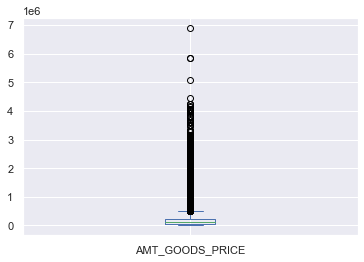

In [215]:
prev_df["AMT_GOODS_PRICE"].plot.box();          


## REPLACING THE NULL VALUES OF AMT_GOODS_PRICE WITH MEDIAN 

In [216]:
prev_df["AMT_GOODS_PRICE"].fillna(prev_df["AMT_GOODS_PRICE"].median(),inplace=True)

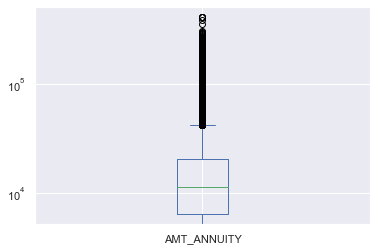

In [217]:
prev_df["AMT_ANNUITY"].plot.box()  
plt.yscale("log");


## REPLACING THE NULL VALUES OF AMT_ANNUITY WITH MEDIAN 

In [218]:
prev_df["AMT_ANNUITY"].fillna(prev_df["AMT_ANNUITY"].median(),inplace=True)

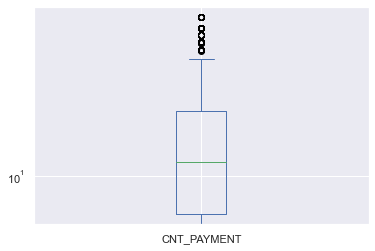

In [219]:
prev_df["CNT_PAYMENT"].plot.box()
plt.yscale("log")

## REPLACING THE NULL VALUES OF CNT_PAYMENT  WITH MEDIAN 

In [220]:
prev_df["CNT_PAYMENT"].fillna(prev_df["CNT_PAYMENT"].median(),inplace=True)

## UNIVARIATE  ANALYSIS 

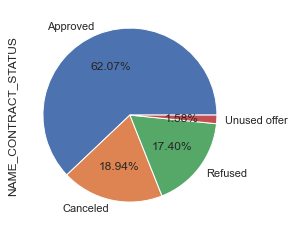

In [221]:
prev_df["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.pie(autopct = '%2.2f%%');

### Observation  :- The rate  of  APPROVAL is higher as compare to other type of status.

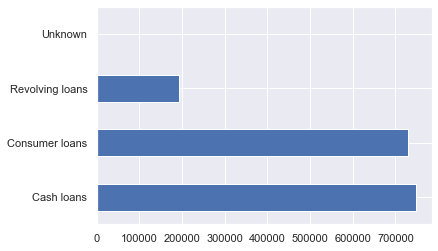

In [222]:
prev_df["NAME_CONTRACT_TYPE"].value_counts().plot.barh();

### Observation  :- The CASH LOAN ARE MORE AS COMPARE TO OTHER TYPE OF LOANS 

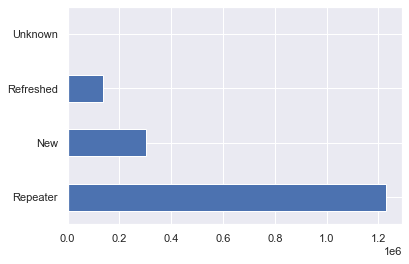

In [223]:
prev_df["NAME_CLIENT_TYPE"].value_counts().plot.barh();

### Observation :- Repeater clients are more as compare to others 

## Bi-VARIATE ANALYSIS

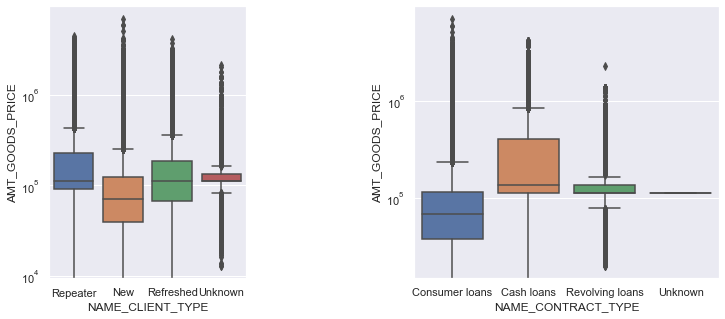

In [224]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.boxplot(x="NAME_CLIENT_TYPE",y="AMT_GOODS_PRICE",data=prev_df)
plt.yscale("log")
plt.subplot(1,2,2)
sns.boxplot(x="NAME_CONTRACT_TYPE",y="AMT_GOODS_PRICE",data=prev_df)
plt.yscale("log")


### Observation :-  Repeaters have the highest AMT_GOODS_PRICE Cash Loans are also more as compare to other loans

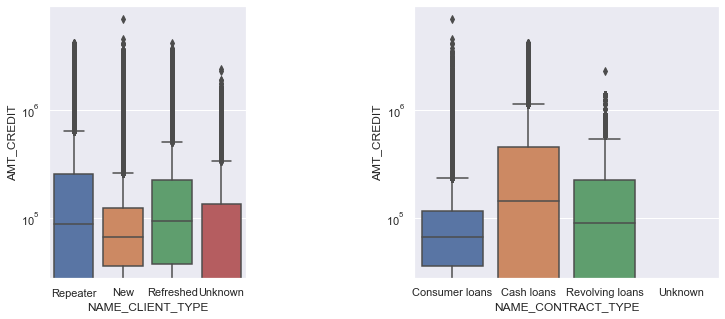

In [225]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.boxplot(x="NAME_CLIENT_TYPE",y="AMT_CREDIT",data=prev_df)
plt.yscale("log")
plt.subplot(1,2,2)
sns.boxplot(x="NAME_CONTRACT_TYPE",y="AMT_CREDIT",data=prev_df)
plt.yscale("log")


### Observation :- Repeaters and Cash loan have the higest value as compare to AMT_CREDIT

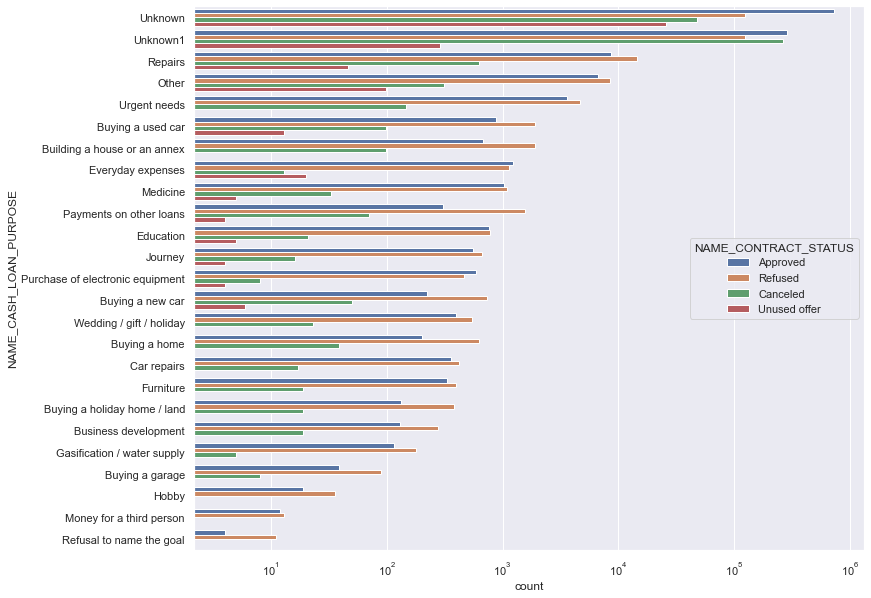

In [226]:
plt.figure(figsize=(12,10))

sns.countplot(data=prev_df,y="NAME_CASH_LOAN_PURPOSE",order=prev_df["NAME_CASH_LOAN_PURPOSE"].value_counts().index
              ,hue="NAME_CONTRACT_STATUS" )      
plt.xscale("log")

### Observation  :-  THE NUMBER OF REFUSED LOANS  ARE for  LOANS AND REPAIR PURPOSE UNKNOWN AND UNKNOWN 1 ARE ALSO VERY POPULAR 

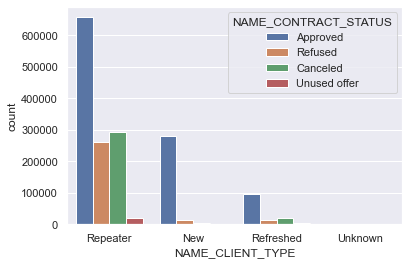

In [227]:
sns.countplot(x="NAME_CLIENT_TYPE" ,hue="NAME_CONTRACT_STATUS",data=prev_df);

## Observation :- Consumers Loans are have more chances to be approved and cash loans have higher Refused rate

In [228]:
### Categorical Col
categ = prev_df.select_dtypes("object").columns
categ

Index(['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [229]:
### Numerical Col
numerical = prev_df.select_dtypes(["int64", "float64"]).columns
numerical

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

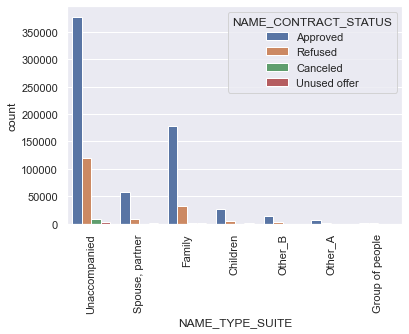

In [230]:
sns.countplot(x="NAME_TYPE_SUITE" ,hue="NAME_CONTRACT_STATUS",data=prev_df)
plt.xticks(rotation=90);

### Observation:- Unaccompained and Famliy type have are the top 2 approval

In [231]:
prev_df.NAME_PRODUCT_TYPE.value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

###   Final Observation  :- 
#### 1) THE RATE OF APPROVAL IS HIGHER AS COMPARE TO  OTHER TYPE OF STATUS
#### 2) The CASH LOAN ARE MORE AS COMPARE TO OTHER TYPE OF LOANS 
#### 3) REPETER ARE MORE AS COMPARE TO OTHERS 
#### 4)REPEATERS HAVE THE HIGHEST AMT_GOODS_PRICE AS COMAPARED AND THE CASH LOANS ARE MORE AS COMPARE TO OTHER LOANS  
#### 5)  THE NUMBER OF REFUSED LOANS  ARE  FOR REPAIR PURPOSE.

## -----------------------------------------------------------------------------------------------------------------------------------------------------------

## MERGING DATA FRAME 

### MERIGNG THE TWO DATA FRAME APPLICATION DATA AND PREVIOUS DATA ON THE COMMON COLUMN


In [232]:
merged_df=pd.merge(app_df,prev_df,on="SK_ID_CURR",suffixes=('_current', '_Previous'))

In [233]:
merged_df.shape

(1413701, 70)

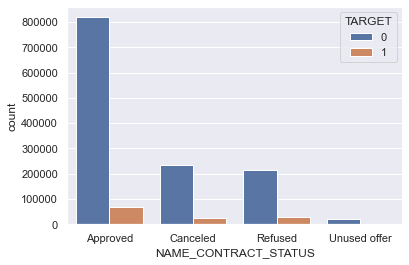

In [234]:
sns.countplot(data=merged_df,x="NAME_CONTRACT_STATUS",hue="TARGET");

### Observation :- Approved status  is high  of Non Defaulters

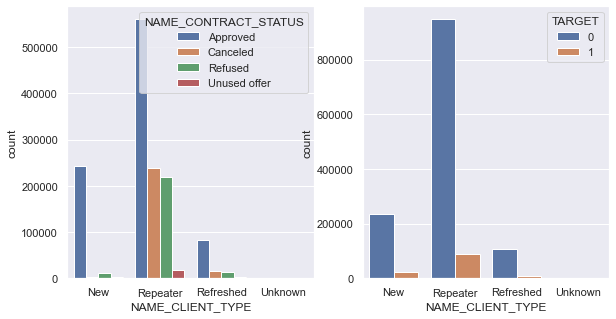

In [235]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)

sns.countplot(x="NAME_CLIENT_TYPE",data=merged_df,hue="NAME_CONTRACT_STATUS")

plt.subplot(1,3,2)

sns.countplot(x="NAME_CLIENT_TYPE",data=merged_df,hue="TARGET");

## Observation :- Repeater are more refused as compared to any other considering their Credit history 

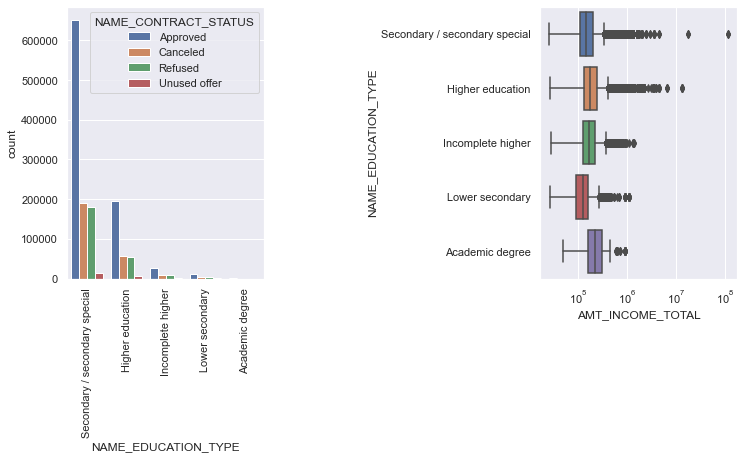

In [236]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.countplot(x="NAME_EDUCATION_TYPE",data=merged_df,hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90);

plt.subplot(1,3,3)
sns.boxplot(x="AMT_INCOME_TOTAL",y="NAME_EDUCATION_TYPE",data=merged_df)
plt.xscale("log")

### Observation   :- Secondary Education has the Highest Approval rate ,although the Income of Academic degree holder are more in comparison Secondary education still the approval rate of Secondary Education is more than Academic Degree holders 


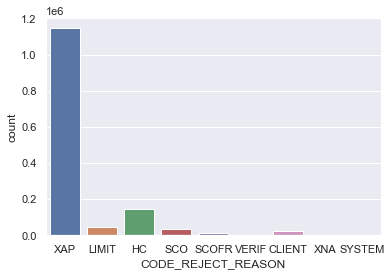

In [237]:
sns.countplot(merged_df.CODE_REJECT_REASON);

###  Observation :- XAP or UNKNOW VARIABLE HAS THE HIGHEST REJECTION RATE   

**For Current application**

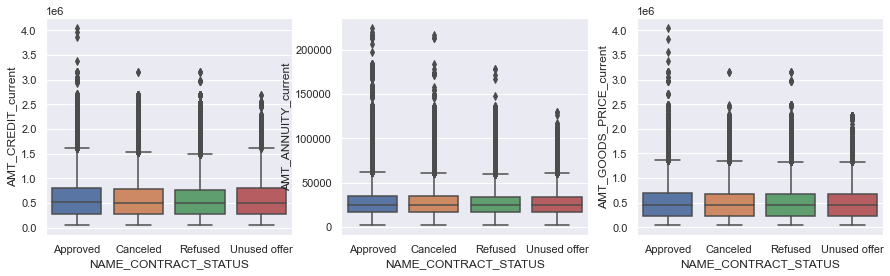

In [238]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(x='NAME_CONTRACT_STATUS',y="AMT_CREDIT_current",data=merged_df)
plt.subplot(1,3,2)
sns.boxplot(x='NAME_CONTRACT_STATUS',y="AMT_ANNUITY_current",data=merged_df)
plt.subplot(1,3,3)
sns.boxplot(x='NAME_CONTRACT_STATUS',y="AMT_GOODS_PRICE_current",data=merged_df);

### Observation  :- FOR AMT_CREDIT_current,AMT_ANNUITY_current,AMT_GOODS_PRICE_current they all have the same value with respect to Contract Status 

**For Previous**

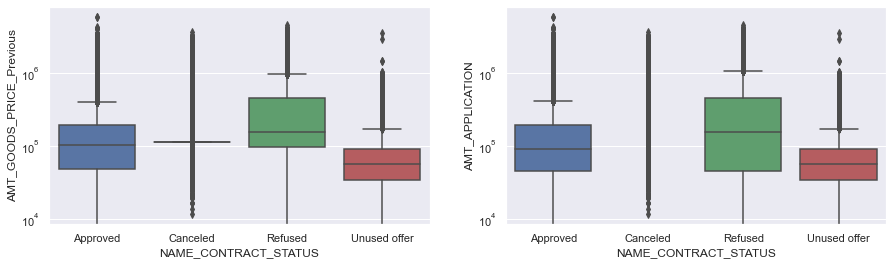

In [239]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.boxplot(x='NAME_CONTRACT_STATUS',y="AMT_GOODS_PRICE_Previous",data=merged_df)
plt.yscale("log")

plt.subplot(1,2,2)
sns.boxplot(x='NAME_CONTRACT_STATUS',y="AMT_APPLICATION",data=merged_df)
plt.yscale("log")


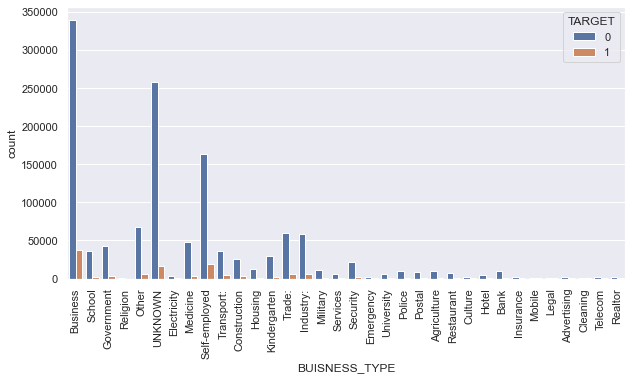

In [240]:
plt.figure(figsize=(10,5))
sns.countplot(x="BUISNESS_TYPE",data=merged_df,hue="TARGET")
plt.xticks(rotation=90);

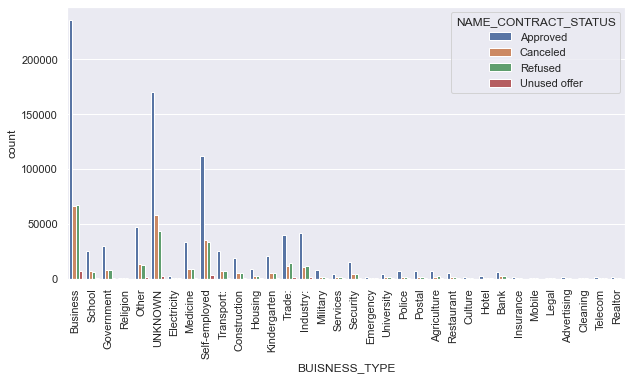

In [241]:
plt.figure(figsize=(10,5))
sns.countplot(x="BUISNESS_TYPE",data=merged_df,hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90);

###  Observation:- Buisness , Unknown  and Self -Employed are the  top 3 occupation where approval rate is more  than any other  occupation

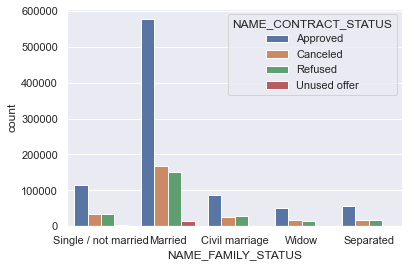

In [242]:
sns.countplot(x="NAME_FAMILY_STATUS",data=merged_df,hue="NAME_CONTRACT_STATUS");


### Observation :- Married people are more likely to get Loan approved in comparison to any other maritial status of people.

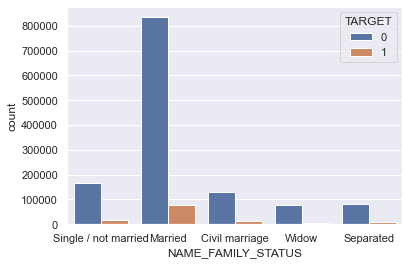

In [243]:
sns.countplot(x="NAME_FAMILY_STATUS",data=merged_df,hue="TARGET");


### Observation :- Married people are more likely to get Loab approved in comparison to any other maritial status of people.

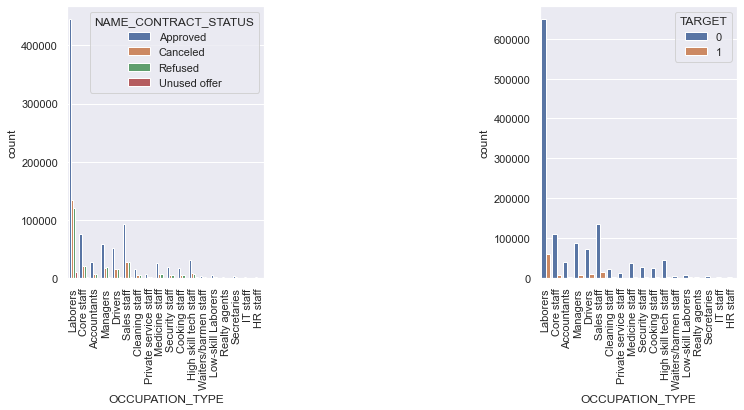

In [244]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)

sns.countplot(x="OCCUPATION_TYPE",data=merged_df,hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90);
plt.subplot(1,3,3)

sns.countplot(x="OCCUPATION_TYPE",data=merged_df,hue="TARGET")
plt.xticks(rotation=90);

### Observation :- Laborers,Core Staff and Sales Staff  is the occupation type that has the loan approved and has the higest approval  rate

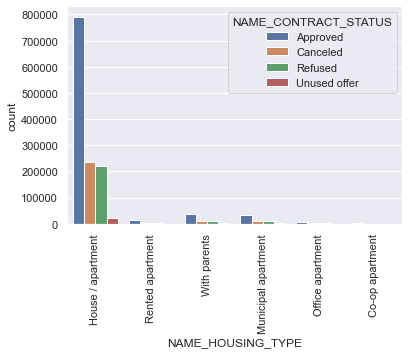

In [245]:
sns.countplot(x="NAME_HOUSING_TYPE",hue="NAME_CONTRACT_STATUS",data=merged_df);
plt.xticks(rotation=90);

## Observation:- House/Appratment have the higest approval rate 

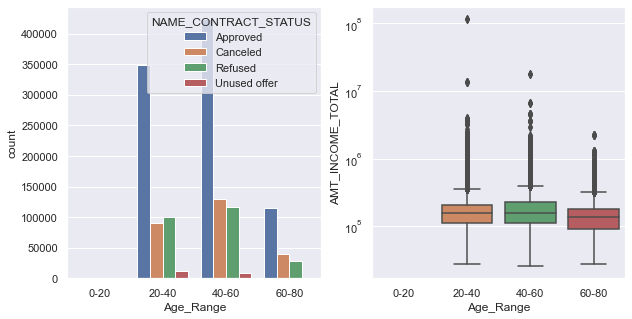

In [246]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x="Age_Range",hue="NAME_CONTRACT_STATUS",data=merged_df)
plt.subplot(1,2,2)
sns.boxplot(x="Age_Range",y="AMT_INCOME_TOTAL",data=merged_df)

plt.yscale("log")



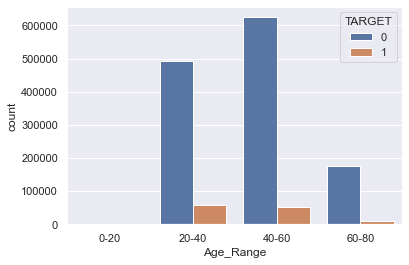

In [247]:
sns.countplot(x="Age_Range",hue="TARGET",data=merged_df);

### Observation:-When analyzing the age range , it is noticed that there is not much of difference in the income of people of age range 20-40,40-60, furthermore the approval rate of people with age range 40-60 has the highest

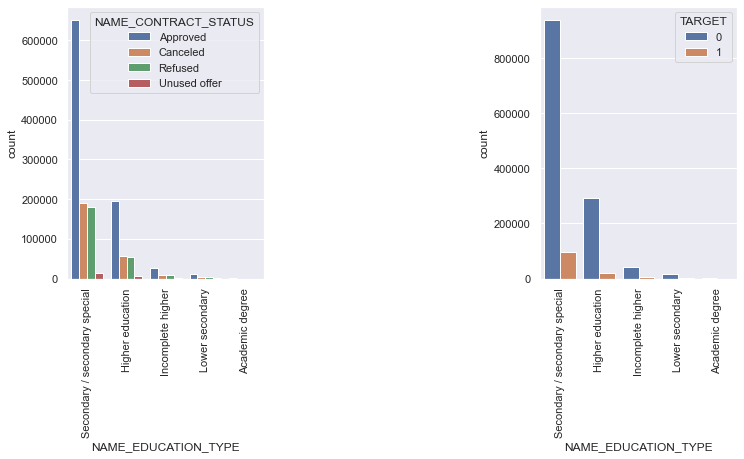

In [248]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)

sns.countplot(x="NAME_EDUCATION_TYPE",data=merged_df,hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=90);
plt.subplot(1,3,3)

sns.countplot(x="NAME_EDUCATION_TYPE",data=merged_df,hue="TARGET")
plt.xticks(rotation=90);

## FINAL OBSERVATION:
### Target variable for Application dataset - "TARGET"
### Target variable for Previous dataset - "NAME_CONTRACT_STATUS"


#### 1) The rate of defaulters are less in the range of 20-40 & 40-60 are good target audience.
#### 2) Laborers , Core and Sales Staff is the occupation type that has the loan approved and has the higest non defaulter rate.
#### 3) Married people are more likely to get loan approved in comprisoion to any other Maritial Status of the people so this is
####       also a good target audience .
#### 4) Secondary Education has the Highest Approval rate ,although the Income of Academic degree holder are more as 
####      Compare to Secondary education still the approval rate is more than Academic Degree holders.

# ---Thank You---